In [1]:
# Import the libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.feature_extraction.text import TfidfVectorizer

%matplotlib inline

Given below is a user-defined function to remove unwanted text patterns from the tweets. It takes two arguments, one is the original string of text and the other is the pattern of text that we want to remove from the string. The function returns the same input string but without the given pattern. We will use this function to remove the pattern ‘@user’ from all the tweets in our data.

In [2]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt

In [3]:
presidential_account_apc = pd.read_csv('/Users/Desktop/Senti Project/2015/mbuhari.csv')
apc_keyword = pd.read_csv('/Users/Desktop/Senti Project/2015/apcc.csv')
pdp_keyword = pd.read_csv('/Users/Desktop/Senti Project/2015/pdp.csv')
buhari_keyword = pd.read_csv('/Users/Desktop/Senti Project/2015/buhari.csv')
jonathan_keyword = pd.read_csv('/Users/Desktop/Senti Project/2015/jonathan.csv')

In [4]:
jonathan_keyword.head()

id                      created_at  \
0  581969004526477312  Sat Mar 28 23:59:57 +0000 2015   
1  581968987711508480  Sat Mar 28 23:59:53 +0000 2015   
2  581968952072495106  Sat Mar 28 23:59:45 +0000 2015   
3  581968920460046336  Sat Mar 28 23:59:37 +0000 2015   
4  581968920116072448  Sat Mar 28 23:59:37 +0000 2015   

                                       original_text      screen_name  \
0  You say wetin? RT @PremiumTimesng: #NigeriaDec...     CallHimDammy   
1  Jonathan, Buhari and 56 million PVCs in-betwee...   OpinionNigeria   
2  @kirstenareveli1 @KierstinShears @sbretz05 @An...     jenlschiffer   
3                  @wilhenkuchta amigo é a realidade   jonathan_aires   
4  When PDP supporters tell you that GEJ till 201...  TheReturnOfArse   

    author_id  replies  retweet_count               to         hashtags  \
0   155786639        0              1              NaN  #NigeriaDecides   
1   623557211        0              0              NaN              NaN   
2    70721393        0              0  kirstenareveli1              NaN   
3   375943810        1              0     wilhenkuchta              NaN   
4  1573285915        0              0              NaN              NaN   

                              user_mentions                    urls  
0                           @PremiumTimesng    http://goo.gl/aV9OL7  
1                           @OpinionNigeria   http://shar.es/1gbAb0  
2  @kirstenareveli1 @renee4bzs @BlondaRoque                     NaN  
3                             @wilhenkuchta                     NaN  
4                                       NaN  http://fb.me/7bB4eUxYx

In [5]:
jonathan_keyword.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             10000 non-null  int64 
 1   created_at     10000 non-null  object
 2   original_text  10000 non-null  object
 3   screen_name    10000 non-null  object
 4   author_id      10000 non-null  int64 
 5   replies        10000 non-null  int64 
 6   retweet_count  10000 non-null  int64 
 7   to             1145 non-null   object
 8   hashtags       2829 non-null   object
 9   user_mentions  3204 non-null   object
 10  urls           4594 non-null   object
dtypes: int64(4), object(7)
memory usage: 859.5+ KB


In [6]:
pdp = pdp_keyword.append(jonathan_keyword, ignore_index=True)

In [7]:
pdp.head()

id                      created_at  \
0  581969001925988352  Sat Mar 28 23:59:57 +0000 2015   
1  581968997790408704  Sat Mar 28 23:59:56 +0000 2015   
2  581968994082643968  Sat Mar 28 23:59:55 +0000 2015   
3  581968989993201664  Sat Mar 28 23:59:54 +0000 2015   
4  581968984628719616  Sat Mar 28 23:59:53 +0000 2015   

                                       original_text     screen_name  \
0  @Basswaht that's all I'm asking, and it seems ...        nnwigene   
1  Reps: PDP 108, APC 530, labour party 1, invalid 4         kasym24   
2  Presidential result finally done with in my PU...      BusyBrain1   
3                          jist me about APC and pdp        AganranO   
4  Obasanjo left PDP and for the first time, won ...  faroukshateema   

    author_id replies retweet_count        to hashtags         user_mentions  \
0   105110935       0             0  Basswaht      NaN             @Basswaht   
1   378659817       0             0       NaN      NaN                   NaN   
2    69619872       0             9       NaN      NaN  @Omojuwa @DeleMomodu   
3  3113687521       0             0       NaN      NaN                   NaN   
4  2278503538       0             0       NaN  #Change                   NaN   

  urls  
0  NaN  
1  NaN  
2  NaN  
3  NaN  
4  NaN

In [8]:
pdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             30001 non-null  object
 1   created_at     30001 non-null  object
 2   original_text  30001 non-null  object
 3   screen_name    30001 non-null  object
 4   author_id      30001 non-null  object
 5   replies        30001 non-null  object
 6   retweet_count  30001 non-null  object
 7   to             3507 non-null   object
 8   hashtags       9348 non-null   object
 9   user_mentions  12086 non-null  object
 10  urls           7629 non-null   object
dtypes: object(11)
memory usage: 2.5+ MB


In [9]:
pdp['party'] = 'PDP' 

In [10]:
pdp.head()

id                      created_at  \
0  581969001925988352  Sat Mar 28 23:59:57 +0000 2015   
1  581968997790408704  Sat Mar 28 23:59:56 +0000 2015   
2  581968994082643968  Sat Mar 28 23:59:55 +0000 2015   
3  581968989993201664  Sat Mar 28 23:59:54 +0000 2015   
4  581968984628719616  Sat Mar 28 23:59:53 +0000 2015   

                                       original_text     screen_name  \
0  @Basswaht that's all I'm asking, and it seems ...        nnwigene   
1  Reps: PDP 108, APC 530, labour party 1, invalid 4         kasym24   
2  Presidential result finally done with in my PU...      BusyBrain1   
3                          jist me about APC and pdp        AganranO   
4  Obasanjo left PDP and for the first time, won ...  faroukshateema   

    author_id replies retweet_count        to hashtags         user_mentions  \
0   105110935       0             0  Basswaht      NaN             @Basswaht   
1   378659817       0             0       NaN      NaN                   NaN   
2    69619872       0             9       NaN      NaN  @Omojuwa @DeleMomodu   
3  3113687521       0             0       NaN      NaN                   NaN   
4  2278503538       0             0       NaN  #Change                   NaN   

  urls party  
0  NaN   PDP  
1  NaN   PDP  
2  NaN   PDP  
3  NaN   PDP  
4  NaN   PDP

In [11]:
pdp.columns

Index(['id', 'created_at', 'original_text', 'screen_name', 'author_id',
       'replies', 'retweet_count', 'to', 'hashtags', 'user_mentions', 'urls',
       'party'],
      dtype='object')

In [12]:
pdp = pdp.drop(['id', 'created_at', 'screen_name', 'author_id', 'replies', 'retweet_count', 
           'to', 'hashtags', 'user_mentions', 'urls'], axis = 1) 
  

In [13]:
pdp.head()

original_text party
0  @Basswaht that's all I'm asking, and it seems ...   PDP
1  Reps: PDP 108, APC 530, labour party 1, invalid 4   PDP
2  Presidential result finally done with in my PU...   PDP
3                          jist me about APC and pdp   PDP
4  Obasanjo left PDP and for the first time, won ...   PDP

In [14]:
#Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
pdp['tidy_tweet'] = pdp['original_text'].apply(cleanTxt)

# Show the cleaned tweets
pdp.head()

original_text party  \
0  @Basswaht that's all I'm asking, and it seems ...   PDP   
1  Reps: PDP 108, APC 530, labour party 1, invalid 4   PDP   
2  Presidential result finally done with in my PU...   PDP   
3                          jist me about APC and pdp   PDP   
4  Obasanjo left PDP and for the first time, won ...   PDP   

                                          tidy_tweet  
0   that's all I'm asking, and it seems to be a p...  
1  Reps: PDP 108, APC 530, labour party 1, invalid 4  
2  Presidential result finally done with in my PU...  
3                          jist me about APC and pdp  
4  Obasanjo left PDP and for the first time, won ...

I want to add the tweets’ subjectivity and polarity to the DataFrame. In order to do this, I’ll create two functions: one to get the tweets called Subjectivity (how subjective or opinionated the text is — a score of 0 is fact, and a score of +1 is very much an opinion) and the other to get the tweets called Polarity (how positive or negative the text is, — score of -1 is the highest negative score, and a score of +1 is the highest positive score). Next I’ll store the results into two columns — one called Subjectivity and the other called Polarity — and show the results.

In [15]:
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
pdp['Subjectivity'] = pdp['tidy_tweet'].apply(getSubjectivity)
pdp['Polarity'] = pdp['tidy_tweet'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
pdp.head()

original_text party  \
0  @Basswaht that's all I'm asking, and it seems ...   PDP   
1  Reps: PDP 108, APC 530, labour party 1, invalid 4   PDP   
2  Presidential result finally done with in my PU...   PDP   
3                          jist me about APC and pdp   PDP   
4  Obasanjo left PDP and for the first time, won ...   PDP   

                                          tidy_tweet  Subjectivity  Polarity  
0   that's all I'm asking, and it seems to be a p...      0.000000     0.000  
1  Reps: PDP 108, APC 530, labour party 1, invalid 4      0.000000     0.000  
2  Presidential result finally done with in my PU...      1.000000     0.000  
3                          jist me about APC and pdp      0.000000     0.000  
4  Obasanjo left PDP and for the first time, won ...      0.166667     0.125

In [16]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'


pdp['sentiment'] = pdp['Polarity'].apply(getAnalysis)
# Show the dataframe
pdp.head(10)

original_text party  \
0  @Basswaht that's all I'm asking, and it seems ...   PDP   
1  Reps: PDP 108, APC 530, labour party 1, invalid 4   PDP   
2  Presidential result finally done with in my PU...   PDP   
3                          jist me about APC and pdp   PDP   
4  Obasanjo left PDP and for the first time, won ...   PDP   
5  RT @abubakar47i The PU at Layin Kuka, U/Dosa: ...   PDP   
6  [DailyPost] Nigeria Decides: APC floors PDP in...   PDP   
7  "@Latchenko: Polling Unit Ward 016 faskari LG ...   PDP   
8       @KobokoGCFR so nah PDP be night crawlers abi   PDP   
9  RESULT: Minister of Education Mal. Shekarau PU...   PDP   

                                          tidy_tweet  Subjectivity  Polarity  \
0   that's all I'm asking, and it seems to be a p...      0.000000     0.000   
1  Reps: PDP 108, APC 530, labour party 1, invalid 4      0.000000     0.000   
2  Presidential result finally done with in my PU...      1.000000     0.000   
3                          jist me about APC and pdp      0.000000     0.000   
4  Obasanjo left PDP and for the first time, won ...      0.166667     0.125   
5  47i The PU at Layin Kuka, U/Dosa: Presidential...      0.000000     0.000   
6  [DailyPost] Nigeria Decides: APC floors PDP in...      0.000000     0.000   
7  ": Polling Unit Ward 016 faskari LG katsina st...      0.000000     0.000   
8                   so nah PDP be night crawlers abi      0.000000     0.000   
9  RESULT: Minister of Education Mal. Shekarau PU...      0.000000     0.000   

  sentiment  
0   Neutral  
1   Neutral  
2   Neutral  
3   Neutral  
4  Positive  
5   Neutral  
6   Neutral  
7   Neutral  
8   Neutral  
9   Neutral

In [17]:
dict = {'Neutral' : 0, 'Positive' : 1, 'Negative' : -1}

In [18]:
# Remap the values of the dataframe 
pdp['sent']= pdp['sentiment'].map(dict) 

In [19]:
pdp.head()

original_text party  \
0  @Basswaht that's all I'm asking, and it seems ...   PDP   
1  Reps: PDP 108, APC 530, labour party 1, invalid 4   PDP   
2  Presidential result finally done with in my PU...   PDP   
3                          jist me about APC and pdp   PDP   
4  Obasanjo left PDP and for the first time, won ...   PDP   

                                          tidy_tweet  Subjectivity  Polarity  \
0   that's all I'm asking, and it seems to be a p...      0.000000     0.000   
1  Reps: PDP 108, APC 530, labour party 1, invalid 4      0.000000     0.000   
2  Presidential result finally done with in my PU...      1.000000     0.000   
3                          jist me about APC and pdp      0.000000     0.000   
4  Obasanjo left PDP and for the first time, won ...      0.166667     0.125   

  sentiment  sent  
0   Neutral     0  
1   Neutral     0  
2   Neutral     0  
3   Neutral     0  
4  Positive     1

In [20]:
pdp.to_csv('pdp2015.csv', encoding='utf-8')

In [21]:
del dict

In [22]:
# word cloud visualization
allWords = ' '.join([twts for twts in pdp['tidy_tweet']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)
plt.figure(figsize=(15, 10))

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [23]:
# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = pdp.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['sentiment'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['tidy_tweet'][i])
    print()
    j= j+1

Printing positive tweets:

1) Obasanjo left PDP and for the first time, won his ward. If that's not Change, wonder what is.

2) Na'ibawa Primary School, Kano city- APC scored 2493, PDP 41.

3) ": The fact that David Mark lost in his native state suggests that PDP will surely CRUMBLE at the presidentials NigeriaDecides"

4) So far so good it's been APC winning..personal research and news around the country but we hear PDP votes use to... 

5)  No party can beat the PDP in "government magic"! Vigilance needed! They will use all the abracadabra in their arsenal!

6) Conspiracist "_Marc: I'll be Shocked if GMB wins...&13;&13;I do want him to win... But PDP's got too much influence up in INEC.."

7) Now let's be realistic,PDP is so dominant there's no PU in d country they wudn't get a single vote,except ofkos d process wasn't fair.

8) IN CAPS LOCK ! HAHA ! ?“__Seun: Bolari PU, Gombe State. PRES.: APC- 336, PDP - 0. - Olu Adegoke WatchNg2015 ”"

9) Card Reader Failure: INEC Should Have List


561) Maitama model primary school Abuja. APGA:93, PDP: 332, APC: 600 .

562) "_Mekus: ": PDP 73,people shouted Otueke! Hahahaha"Where oooooo?" Wicked people LOL

563) PU: Tsohuwar Kasuwa, Katsina State. Presidential, APC: 408 PDP: 3 cc 7 _ess _baffah 

564) "Clearly Buhari is the winner but PDP votes are like Garri they swell after elections..

565)   u been dreaming your PDP should worry more.....

566) Me don go sleep ": I dey o ": I juss realized I'm d only PDP fan awake. Biko I aint gat no worries. una good night o""

567) :| : PDP is in SOUP ": I was predicting 30% for APC in Plateau State but sauces are saying it could be as high as 40%

568) Nigeriadecides2015 - Early polling results. RIVERS STATE AWELGA WARD 002 UNIT 003 House of Reps. PDP-198... 

569) Good :  RESULTS: PU 020, Banex Plaza Abuja, FCT Presidential APC: 338 PDP: 313 Nigeriadecides

570) How far with PDP?  flopping already?

571)  . Check the results so far in those states... Truly PDP don do their home wrk!

572

954) Looooooooool ": Lmao": I won't be surprised if the final elections read APC : 34655889965325679953356790063 PDP: 491""

955) Sen Lado (PDP Kano Central) lost in his own ballot box PU/025: Presidency: APC 187 - PDP 9 Reps: APC 174 - PDP 17 Sen: APC 161 - PDP 32

956)  A whole Senate President..it seems all d President's Men didn't deliver.,but PDP's wonders only ends when we hear d final result

957) I'm not pissed because I know how distant our level of thinking is. For one to take the whole of PDP &amp; think you're referring to their pops

958) I won my polling unit lol, Agent of change Dawaki/katuru road Presidential APC: 518 PDP: 0 Senatorial APC: 512 PDP: 3 Reps APC:483 PDP: 2

959) So...I'm getting the results in right now out of all the 10wards in Olorunsogo LG. PDP won just two units for Presidential Ballots.

960) PDP can still come out with their magic wand and turned the results upside down ...  be watchful

961) Its not over until Jega annouces the result. PDP guys are

1468) PDP can quite be funny at night. Nigerians must be vigilant Nigeriadecides" Say no to sleep

1469) LWKMD "_FANCY: Walahi _Ninja: Tinubu may be a looter but he get brain pass the whole PDP combined. Nigeriadecides"

1470) pdp take early lead in Abuja

1471) Shout out to the beautiful people of Delta state. Thank you and God bless you. PDP GANG RUNNING THIS DONTPANIC

1472) Brainbox, tell us _: Olodo.hw many pple dey Lekki?? ": My Islanders, My People. _muel: Lekki Phase1 APC: 9872 PDP:4

1473) You see? ": They are counting right now “: WilDeji I hear PDP lost in the villa o. Not confirmed though.”"

1474) Are u guys scared f d nite? Only real men talk  :d ": PDP can quite be funny at nite. 9ja must b vigilant Nigeriadecides"

1475) Buhari wins Abuja Barracks 717 registered voters, APC - 280, PDP - 213 votes. Nigeriadecides

1476) Lol tf : Presidential Villa House of Reps: Unit 021: APC 255; PDP254. Unit 022: APC 334: PDP 241 Nigeriadecides

1477) In Lagos APC leads PDP by a margin

1893) This twitter sha, all d results mr A tweets apc wins, all d results mr B tweets, pdp wins, sometimes they even tweet for same pu

1894) PDP Leads in Ekiti state and APC Wins Lagos, and Others. 

1895) My PDP friends re not happy at all they are calling APC bullies lol it's not our fault its because GEJ said we don't deserve new trains

1896) Lol the Metuselah of PDP “: BREAKING: David Mark has just lost in Otukpo, Benue. His first defeat in 16 years”

1897) Buhari wins in Abuja Barracks 717 registered voters, APC - 280, PDP - 213 votes. NigeriaDecides

1898) ": My hatred for GEJ and all things PDP is ETERNAL NigeriaDecides" Take it easy on urself boy, not healthy at all

1899) As a true Democrat.. I do my best not to tweet election results.. But PDP is winning ..

1900) Abi ": Very soon you'll be hating APC too ": My hatred for GEJ and all things PDP is ETERNAL NigeriaDecides""

1901) PDP Leads in Ekiti state and APC Wins Lagos, and Others. 

1902) Hahahaha patience Jonathan don 


2365) Buhahaha "_MUFC: Lol "4all44: Hahahaha ": Chatham House PU : Presidential APC - 350 PDP - 0 Nigeriadecides"""

2366) Senator Philip Aduda was as well deliver resoundably in my PU Idu primary school 010. PDP-387 APC-83 wetriumphstill

2367) APC is just PDP, and PDP is just APC. Calm down. No need to preach. All thieves. Daz all.

2368) polling unit: Government House Maiduguri Polling Unit (Borno) APC 565 PDP 67 SitRoom15 󾍘"nice result"

2369)  ah pdp haha ,se for memo da um salve

2370) 👏“_An33sa: I've crammed it. Apc 108 pdp 0"__prolifik__: “_An33sa: My best result is from Bama in Borno!! Nigeriadecides change”c

2371) Lol ": JK is just kidding loses unit (Jimi Agbaje) Presidential: APC = 126 PDP = 60"

2372) To be honest. I need to say this.. PDP try for Lagos. As in. Them try.

2373) Baba still win aso rock PU. Legendary Buhari clears his PU with 499 votes, PDP at 0, invalid 0

2374) dear PDP better not make the mistake of rigging dis election let d will of the people prevail 

2877) NO!!! People are announcing what they see before PDP does their white witch magic and emerge as winners! Same story everyday 

2878) ": Am going 2 bed now!Happy and satisfied!PDP please do not RIG before I wake up ooo!IvotedGMB" exactly what am thinking

2879) “_LFC:Is it dat serious??":I would jejeli unfollow all those PDP publicists.I sabi all their handle"”Im sure they care

2880) Nothing seems to be coming from PDP strongholds. All this buharists screaming up and down should better calm down. Waka still plenty

2881)   even without voting, ballot snatching, zero result sheet etc. That's what PDP wants anyway. God help us

2882) “_Emmcap__: Aswear APC 423 PDP 1"7: “_Emmcap__: Lol! Funny the presidential result for my polling unit” tweet"” Lol, Norms

2883) _ezinne Femi fani kayode was defeated in his ward: APC 127. PDP 44 .IKOGOSI EKITI : Presidency : APC 900. PDP 300. =)) killurself

2884) Lol!: Layin yan zuma, Tudun Wada, Kaduna. Presidential; APC: 622 PDP: 0 SitRoom15 Niger

3225) I won my polling unit lol, Agent of change Dawaki/katuru road Presidential APC: 518 PDP: 0 Senatorial APC: 512 PDP: 3 Reps APC:483 PDP: 2

3226) PDP can still come out with their magic wand and turned the results upside down ...  be watchful

3227) Its not over until Jega annouces the result. PDP guys are capable of doing abracadabra sturvssss

3228) just a little advice to y'all.don't fucking get ur hope too high, okay if Na PDP or APC none of dem will help n none of dem worth dying 4

3229) _TOR Sólo me dio curiosidad y aprendí algo nuevo. Muchas gracias :)

3230) Lool good kini? _nessaLM: I like that "2tt: Pdp giving Apc a good run in Lagos...""

3231) Went through someone's TL and PDP is winning there. See why I don't trust Twitter results? Let me just jejely wait for INEC.

3232) My polling unit::sarkin kidi unit 005 President APC 504 President PDP 15 Long live GMB victory is ours insha Allah

3233) This reminds me of 2011, we were jumping for joy right here on twitter as it

3678) The Buruji himself.. Lol “:  80 kashamu lost in my unit PDP 49 APC 62”

3679)  New Gra Gwange III ward Presidential: APC- 187 PDP- 17 Senatorial: APC- 176 PDP- 26 Reps: APC- 179 PDP- 27.. Invalid not incl

3680)  PDP on top in Benue

3681) Presidential Results of 3 Units in New GRA Maiduguri. Ashegar unit New GRA. Unit code 042 PDP = 17 APC = 187... 

3682)  ..2/2: If PDP eventualy win the president pls we shld expunged the paragh of defendin d citizenry frm GEJ's oath taking on May 29

3683) Gamawa Unguwar Baba "B", Bauchi State: Presidentials APC: 314 PDP: 1 Void: 3 NigeriaDecides SitRoom15   

3684) My polling booth was wonderful, head thugs for APC & PDP shared drinks and emphasised that there be no violence, couldn't wait 4 results tho

3685) Very funny ": PDP can quite be funny at night. Nigerians must be vigilant Nigeriadecides"

3686) Tanks hun _babz: “Interesting _teddy: Win or lose...I'm proud of PDP o jere”"

3687) Is this really PDP or Propaganda? 

3688) Assignment d

4101) iD10t : Last result from my ward APC: 0 PDP: 0 KOWA: 0 Oha soup: I overfed myself &amp; the struggle to go home is huge

4102) Interesting!!!! Goodluck Jonathan also lost to Buhari in Aso Rock Polling Unit: Presidential APC - 334 PDP - 241 Nigeriadecides

4103) : NigeriaDecides: APC wins Obasanjo's polling unit: Presidential: APC-100, PDP-16 

4104)  just a confirmation from you and I'll go to bed a happy man, Hope PDP's vote won't swell overnight like garri ijebu

4105) AdForumCo PRESIDENTIAL RESULTS LGA: IBEJU LEKKI WARD: IBEJU 1 APC 223 PDP 201 PUs Reported: 3 Nigeriadecides

4106) I want to thank God for bringing me safely to portharcourt after the elections. PDP is a great time in rivers... 

4107) The PDP govship candi in Lag State Jimi Agbaje lost in his polling 2 the APC in presidential election.Read more here: 

4108) PDP in early lead in Rivers, Anambra, Akwa-Ibom as it suffer lost in Kano, Kebbi and Niger states.

4109) *popcorn* "_: F!! "_Hajaar: Ur brain smells tho :

4477)  Oh okay. I just think the PDP needs a serious opposition not a fragmentation of interests, weakens opposition, empowers the PDP

4478) Habaa “: His tribal marks will be more than PDP votes ISA " PDP’ll Win Sokoto –Bafarawa ”

4479) "1990: “: SitRoom15PU 022 Maitama final results Presidential APC-323 VOTES PDP-197 VOTES 60% win Nigeriadecides"

4480) Buhari wins in Abuja Barracks 717 registered voters, APC - 280, PDP - 213 votes. Nigeriadecides

4481) Result So Far. 7) Jigawa...APC(90%) PDP(10%) 8) Yobe..APC(92%) PDP(8%) 10) Borno..APC(90%) PDP(10%)   

4482) Dino Baba . All The Best . God don do am.."_melaye: Deeper life unit. Kogi west. Senate Pdp 85 Apc 190 Ap 17"

4483) BEAUTIFUL! “: Presidential Villa: APC defeats PDP 

4484) ": Mogadishu Cantonment Abuja APC 131 PDP 75 Nigeriadecides " the army wants change

4485) “: Buhari wins in Abuja Barracks 717 registered voters, APC - 280, PDP - 213 votes. Nigeriadecides” 🙌🙌🙌🙌

4486) Lmao!"_dunni: Lmao. All our tenants don fuck up bi

4858) Buhari Wins Jonathan in Polls Counted at Presidential Villa - The results of the presidential election in P... 

4859) If I hear say.... Jonathan win for North

4860) Nice to meet Jonathan Night! Look for the new acquaintances in the streets of London!  iPad iPadGame...

4861) GEJWinsIt 🙌🙌🙌🙌🙌🙏 _H: I doubt ": I Av this fear dt Jonathan might still win this election..

4862) News Update: Jonathan votes at Otuoke, says INEC will conduct credible polls 

4863) Hahahaha patience Jonathan don do am again ooooo instead of voting for PDP she don go vote for APC

4864) Honored for Jonathan to serve on our board &amp; teach workshops. Generous recognition in the latest issue 

4865) News Update: Jonathan votes at Otuoke, says INEC will conduct credible polls 

4866) B-r-e-a-k-i-n-g-n-e-w-s: Jonathan loses at presidential Villa polling units- See more at: 

4867) Congrats Jonathan for winning 1st junior Solo. 👯👯👯 so very proud of you 😘😘😘 

4868) Story for the gods “: I Might Not Be Perfect,

5295) NigeriaDecides-Patience Jonathan casts her vote(Photos): The First Lady,Patience Jonathan casting her vote at... 

5296) I'm watching Jonathan Ross, and enjoying the way Keanu Reeves is watching Russell Brand. With extreme caution.

5297) Russell Brand on the Jonathan Ross Show! 😂 I just love him! 😍✌️  

5298) Well, I WAS enjoying The Jonathan Ross show!! Can't make my mind up on Russell Brand

5299) Jonathan Capeharts take on the young man who apologized for racist fraternity chant 

5300) NigeriaDecides – Patience Jonathan Casts Her Vote: The First Lady,Patience Jonathan casting her vote at Ward ... 

5301) NigeriaDecides – Patience Jonathan Casts Her Vote: The First Lady,Patience Jonathan casting her vote at Ward ... 

5302) Good to see the lads representing Essex on the Jonathan Ross show.

5303) Guayaquil inundada pero Nebot y sus "progresistas" dicen que es normal y que está bien porque es un "modelo exitoso".

5304) Confusion In Otukpo, As Wife Of President Jonathan Mistak

5686)  you make me 😂😂😂on Jonathan Ross pure class xx💙💙😘😘

5687) I Might Not Be Perfect, But Buhari Is Definitely Not An Option- Pres. Jonathan 

5688) I Might Not Be Perfect, But Buhari Is Definitely Not An Option- Pres. Jonathan 

5689) I Might Not Be Perfect, But Buhari Is Definitely Not An Option- Pres. Jonathan 

5690) I Might Not Be Perfect, But Buhari Is Definitely Not An Option- Pres. Jonathan  YUNGTIZ bb:33101f87

5691) Jonathan Ross show wins every time 👏

5692) Nice to meet Jonathan Night! Look for the new acquaintances in the streets of London!  Android AndroidGames

5693) ": Jonathan will not be president from May 29, 2015. The earlier you accept that into your future plans, the better for you."

5694) Mehn knowing Nigeria, there will be some last minute Mago Mago. At the end of the day, Jonathan will still win.

5695) Loving  singing Shaggy's Mr Bombastic on Jonathan Ross Show and fab dancing from 

5696) Wow!  on Jonathan Ross 😍 mrboombastic hilarious!!

5697)  doing Mr B

6081) NigeriaDecides-Patience Jonathan casts her vote(Photos)  The First Lady,Patience Jonathan casting her vote at War…

6082) Kowa Party oo.."_Baby: Me too o. I really hope and pray that Jonathan wins. : I really hope and pray that Buhari wins.

6083) ": Goodluck Jonathan could not even win poling units in Presidential Villa 

6084)  jona most go otuoke go go go jonathan never again  

6085) Love Yourself Meditation - Guided Meditation Jonathan Kiekbusch - YouTube 

6086) Nice to meet Jonathan Night! Look for the new acquaintances in the streets of London!  iPad iPadGame...

6087) BREAKING NEWS! Goodluck Jonathan in early lead. South-East = GEJ South-South = GEJ North-Central = GEJ... 

6088) GIVEAWAY Enter to win POND’S + Jonathan Adler Wet Cleansing Towelettes Vanity Case &amp; $200 Jonathan Adler GC! 

6089) Goodluck Jonathan could not even win poling units in Presidential Villa 

6090) _Goff      this is awesome

6091)   Although, the BrBa No Half Measures speech is amazing. Jona

6434) New NZ National Record for Jonathan Selman in the Boys 12 yrs 50 Back at the Northern Zone Junior Meet. New time 30.80. Well done Jonathan!

6435) How Jaromir Jagr makes Aleksander Barkov and Jonathan Huberdeau better | The Hockey News 

6436) It is a beautiful day

6437) As APC lose na GOD WIN, as PDP win na GOD! As jonathan win na GOD WIN........evritin dem do na GOD WIN, na GOD WIN

6438) The dancing has started at the  dinner. Follow that Jonathan . Awesome! 

6439) I’m Hopeful Of Victory – Jonathan: President Goodluck Jonathan has expressed confidence he will win today’s pr... 

6440) _of_Jonathan I'm special. my creator says I'm special so I must be special. now please go away. you offended me.

6441) I didn't vote because i don't want Jonathan but i love PDP.i was at home sleeping all d day long. Thanks to God... 

6442) Lol how true is this? ": Aso Rock Villa result PU 022  334 Jonathan 241 Nigeriadecides"

6443) Nigeria's President Jonathan congratulates Kenya's Presiden


7215) Lol. Y'all really think they gonna vote Goodluck Jonathan Outta power? 😂😂😂😂 After making Nigerians laugh, especially from his wife's Bants?😂

7216)  _Lilley whooaaa okay now at least I figured everything out

7217) Jonathan should just forget the North cos I don't see him winning there.

7218) Now I see why my dad wants Jonathan... 😭

7219) Jonathan wins here in Akwa Ibom nigeriadecides

7220) The PDP calls the failure of electronic card readers to verify President Jonathan a "huge national embarrassment." NigeriaDecides

7221) LOL. That's how they asked Jonathan who he voted for. Errr...Stupid Question much.

7222) Nothing real yet"_mimi: What about politics?“_echo: Croatia 1 - 0 Norway HT"_mimi: What's up with the scores? Who's leading

7223) Nice to meet Jonathan Night! Look for the new acquaintances in the streets of London!  iPad iPadGame...

7224) “: President Jonathan's Response After Persistent Card Reader Failure ,good hearted man, if it is APC they wil accuse PDP

7225

In [24]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = pdp.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['sentiment'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['tidy_tweet'][i])
    print()
    j=j+1

Printing negative tweets:

1) When PDP supporters tell you that GEJ till 2019, yes they mean it. It means Jonathan is campaigning to come back... 

2) Fake news oh ": hahahahahaha *my chest* ": Alimosho Lagos State Presidency PDP - 3837 APC - 57,923 NigeiaDecides."

3) ": 1) Sokoto......APC(43%) PDP(45%) 2) Kebbi.........APC(47%) PDP(66%) 3) Niger.........APC(35%) PDP(78%)mtsww a fake result

4) You guys should be wary of PDP shenanigans though. I'm not gonna breathe easy till the winner is announced.

5) _Africa wat PDP refuses to understand is dat d north is only divided on issues of other position but united on presidential.

6) _tom the ones I witnessed, the gap is very wide. On my street, PDP 158, APC 71

7) Any result in favour of APC is fake. anyone in favour of PDP, real. "Pdp pipu twitter logic"

8)  We are now scared in Rivers State. My LGA Asalga, PDP + Police made away with result sheets n materials. Guba might be worse

9)  I pity you. NC, SS, SE already secured for PDP. T

178) PDP pulled some major votes in Lagos tho. I'm shocked at some Lagosians.

179) They nid a doc.. : Seriously, I said dt also ": Seriously mad  Those voting PDP I Borno are mad

180) Mr. Man, calm down. PDP may be in the lead when we wake up. “: APC APC APC !!! We MOVE”

181)  some stupid pdp supporters already sayin our fingers dont count, we re trustin u to gv us what we asked for. we no vote Jona o

182) 12:11Am. PU 012 Kosofe "Magodo Phase II". Void: 46 Other Parties: 5 PDP: 59 APC: 375. Change.

183) PDP could not win the presidential election held at Jimi Agbaje’s polling unit as APC had 126 votes while PDP recorded 60 votes.

184) "_rookie: KOFAR IDI BAUCHI STATE PU: MAJIDADI APC 11 PDP 598 GoodluckWins_"u are a big liar ur result is fake...

185) This is traditional in Naija Elections A party that complains end up being the losing party! PDP sorry o

186) "_Africanist: The god that saved APC &amp;amp; PDP today was this If to say EPL dey this weekend, like only two people fo

274) _melaye Haba Dino! You mean nobody voted PDP? Can someone please pinch me? Am I dreaming?

275) Reporting Live from Lasgidi; APC in a Landslide victory, Bt PDP giving them a fight in a few PU's. (FEW in caps).

276) "1: I haven't seen pdp with (negative) -1 votes.. They have to have a negative vote in order for this election to be complete!!"

277) At 1 of the PUs for IDPs, PDP had ZERO votes. Typical vindictive FG will not give them food until May 29.

278) Lmaooo "_MAGMA: "_BOI: Shocking how PDP is sweeping Lagos o, even fashola's ward" ""😭😭"

279) Jimi agbaje is just kidding loses unit (Jimi Agbaje) Presidential: APC = 126 PDP = 60"

280)  in dis election, dia is no PDP or APC state, it's about good &amp; bad governance, Chibok gals, bad economy, insults from Dame, etc

281) At long last, after about 17hrs 30mins of camping at the polling station, Area11 garki Abuja PU 020; Presidentials: APC =407 PDP =273"

282) The places that have experienced the worst of GEJ's govt will rec

460) Garba Gako Ward, Jos North Presidential: APC 224, PDP 0.  killed it all. IVotedGMB

461) PDP so far is receiving humiliation in my home state of Kebbi. Terribly defeated in every nooks and crannies. ChangeinNigeria

462)  This is my BIGGEST fear in this election!Eternal vigilance is required 2 prevent PDP's overnight magic.We must open our eyes wide

463) aswear": You see not all people contesting under PDP are bad but they will lose elections because people are tired of PDP"

464) AND THERE WAS NO "VOID" OR "BAD" BALLOT FOR THAT YOUR UNIT ABI? NA ONLY PDP AND APC VOTE ABI? SCAMMERS!  2468

465) "Abuja no b his State now : North pple want give Jonathan hypertension pdp no win for any northern states"

466) Benue: Sen Gemade in last fight with gov Suswam  A   APC on top PDP nt very bad yet

467) Fuck pdp

468) PDP loses at presidential villa PUs, fam this is not funny anymore oh. Hian.

469) ": “GOGORI Galadanci PU: 19-03-04-015 KANO presidential : (APC 413) (PDP 0) (Invalid 3)  _P

556)  See as PDP Just dey share money anyhow, I didn't collect because my integrity can't be bought with mere peanuts

557) 😂😂😂😂 ": Lmaoooo so only Sambo Dasuki and one other person voted for PDP in his ward.

558) no more rice for u pple. : Result - Ikogosi Ekiti Presidency APC - 900 PDP - 300 nigeriaDecides SitRoom15 Na

559) PDP is massively defeating APC in the SS and SE as expected! Nigeriadecides

560) Dunno bout oda polling units in Rivers state but I can tell u that unit 8 in ward 13 in obio/akpor was heavily rigged by the PDP agents

561) SHOCKING: FFK just said on TV, "whether you are an APC, PDP &amp; no matter ur religion we're one Nigeria &amp; D eyes of d world is on us". 

562) Hahaha..."1: PDP usually lose during the day. At night? You know the rest..."

563) Info going round that Lagos has been lost to PDP. Not all results are out, plus results haven't been collated officially. NigeraDecides

564) The Result of Government Secondary school, Lugbe, Abuja Reps: PDP 60, AP

684) As usual"_Myusuf: Kaduna Garin Gwamna"_FKO: Namadi sambo Vice President's ward APC 213 PDP 13""

685) ": Nigeria's armpit "_DORAA: See how Umuahia looks like dustbin"" Abia state...Theodore Orji...PDP Out Dirty town!

686)   Nigeriadecides Presidential result at PU 027a: APC-115; PDP-54; VOID-10; Other parties-3.

687) Seriously?": Result - Ikogosi Ekiti Presidency APC - 900 PDP - 300 nigeriaDecides SitRoom15 fb"

688) _G: Spent hours going through NigeraDecides election results; I'm yet to see a single PU won by PDP.. 

689) Nigeriadecides My PU 18-09-04-040 Kaduna: (Pres) APC 198 PDP 138 (Sen) APC 188 PDP 142 (Reps) APC 186 PDP 133

690) _MUFC the PDP folks are jiltery o. APC massively winning here. It's shocking them o.

691) PDP usually lose during the day. At night? You know the rest...

692) ALERT!!!. A message is going round now alleging "results so far" and allocating percentages to APC and PDP for... 

693)   Coming From a corrupt PDP who rigged APC primary to become cand

863) ": JK is just kidding loses unit (Jimi Agbaje) Presidential: APC = 126 PDP = 60" one of d most unintelligent tweets av seen 2day

864) Lmaooo": PDP tweets absent on my TL already?? But I didn't mute anybody :s"

865) "2: This one too u can't find out for urself? “: Who is APC and who is PDP.. I mean who are their respective candidates?”"😪😪😪

866)   Nobody should sleep.PDP deadly at night,they will reverse results.

867) FCT minister Bala loses his P.U Duguri Yuli fada President: APC 331 PDP 24 APA 3 Senate:APC 292 PDP 53, H of R: APC 278 PDP 53

868) “: PDP supporters, TANMITES, Transformers how market today?” haha bad 

869) Finally : 12:11Am. PU 012 Kosofe "Magodo Phase II". Void: 46 Other Parties: 5 PDP: 59 APC: 375. Change.

870) ": Alimosho Lagos State Presidency PDP- 3837 APC- 57923 NigeiaDecides See vexing no light for over a year in that area I guess"

871) Not this time!!!": Someone just fucking said PDP votes are like ijebu Garri.. They will swell after elections 😂😂😂😂

1025) Pdp won with a wide margin also had in luvu after the area 1 pri sch pdp won even in jewun pdp won 

1026) Alimosho Lagos State Presidency PDP - 3837 APC - 57,923 NigeiaDecides. See vexing no light for over a year in that area I guess!

1027) You are mad. Very mad actually : NigeriaDecides 2015 Aso Rock polling unit presidential result APC 109 PDP 19

1028) Angry youths attack PDP member in Jos North  via todayngr

1029) Indeed! ": This is new. "_muel: New Jersey APC: 9870 PDP: 6 However voting commenced very late""

1030) "_Shady: "_Rgungu: "_Shady: We gonna have the last laugh in shaa Allah"i wish so "amin kasan PDP aljanu ne"Kai ina tsoron su

1031) "2015: ": JK is just kidding loses unit (Jimi Agbaje) Presidential: APC = 126 PDP = 60" Nigeriadecides"  ???😂

1032) Olabode George beaten in his polling unit PU001, Evan Street. APC-109, PDP-108. PDP dead and buried in SW.

1033) The down fall of PDP is whhat i'm craving...

1034) Results of 2015 at my PU 370603013 Pres. APC 250 ,

1176)  stop posting irrelevant result are you working for PDP or you are rigging member

1177) "sweeping" gave ur blatant lie away _BOI: Shocking how PDP is sweeping Lagos o, even fashola's ward

1178) Finding the rst from benue hard to bliv _MAGMA: So some of these PDP Governors indirectly worked for GMB... Mimiko, Lamido and Suswan.

1179)  oga is frantically scanning the Net, for where pdp made little stride to console himself, I want to see you in jail for all d lies

1180) Bauchi are just Merciless. From all the results I've seen from there, PDP hardly gets up to 10 votes NigeraDecides

1181) 😂 d ppl deceiving u r from ur village"_BOI: Shocking how PDP is sweeping Lagos o, even fashola's ward"

1182) Since f Governor defecteh bk to d PdP late last month. Dere had not bin peace in d party. So, much division. It os a state dt d

1183)  you are a liar. Stop this propaganda. PDP is loosing massively.

1184) 😭 “_B: Lmao! I started feeling bad for PDP at a point because their agent star


1302) House of Rep: APC 1583, PDP 1468. I'm seeing Change actually coming in d horizon, especially from results from other States. Sai Buhari /4"

1303) “@____DRO: 😂😂😂😂": Lmaoooo so only Sambo Dasuki and one other person voted for PDP in his ward.” His wife probably or one of his kids

1304) ": I'm sorry if the results from my polling unit in surulere hurt u but I've been up since 6am. I'm excited the PDP won." God bless u

1305) “GOGORI Galadanci PU: 19-03-04-015 KANO presidential : (APC 413) (PDP 0) (Invalid 3)  _PR ”SitRoom1

1306) It would be crazy to hear GEJ announced as leader cus it will show democracy has failed us and I'm sorry to say but PDP would rule forever

1307) Blame GEJ & PDP : It's sad that we Nigerians are still voting based on religion nd ethnicity.. Kabilanchi kawai”

1308) ": I heard PDP votes swell like Garri after elections NigeriaDecides”"you didn't hear well ooh. Its false

1309) For president???": It's the other way round now... A ti Change e fun won “2tt: 

1415) @_Kike_lomo lmaooo! I came to conclusion long time ago that FFK is a an APC mole in PDP. Those actions of his can't be ordinary.

1416) "1: But I still believe PDP will do their usual abracadabra overnight....I pray they don't succeed though NigeriaDecides"

1417) _TOR Pero es sábado :/

1418) PDP is massively defeating APC in the SS and SE as expected! Nigeriadecides

1419) For thE past 12 yrs PDP ha run d nig economy on geneRators. I voted for stable power GMB all d way

1420) Thank God for social media, if not PDP would have seat down in Villa and just announce the results. After all they have 

1421)  with Tinubu's acclaimed strength..PdP ended humiliating him...did u get the result at his polling unit? Jst slight varianc

1422) Manual Accreditation Evidence Of Card Reader Failure – PDP: The Peoples Democratic Party (PDP) has said that t... 

1423) I don't know about other state, but if apc result is not triple what pdp has, something is wrong.

1424) _Ninja na so o , I was g

1509)   Nigeriadecides Presidential result at PU 027a: APC-115; PDP-54; VOID-10; Other parties-3.

1510) Seriously?": Result - Ikogosi Ekiti Presidency APC - 900 PDP - 300 nigeriaDecides SitRoom15 fb"

1511) _G: Spent hours going through NigeraDecides election results; I'm yet to see a single PU won by PDP.. 

1512) Nigeriadecides My PU 18-09-04-040 Kaduna: (Pres) APC 198 PDP 138 (Sen) APC 188 PDP 142 (Reps) APC 186 PDP 133

1513) _MUFC the PDP folks are jiltery o. APC massively winning here. It's shocking them o.

1514) PDP usually lose during the day. At night? You know the rest...

1515) ALERT!!!. A message is going round now alleging "results so far" and allocating percentages to APC and PDP for... 

1516)   Coming From a corrupt PDP who rigged APC primary to become candidate. Contradiction at its finest.

1517) ": The power of rice! "_Yazzy: As it stands! PDP are not winning any state in the South-West, except EKITI maybe!""😄😄😄😄

1518) : "1990: Ibadan Presidency APC - 15,000 PDP -

1640) Card reader hiccups avoidable - PDP. Warns against under-aged voters: (adsbygoogle = window.adsbygoogle || [])... 

1641) Card reader hiccups avoidable - PDP. Warns against under-aged voters: (adsbygoogle = window.adsbygoogle || [])... 

1642) You say wetin? : NigeriaDecides: Jonathan loses Aso Rock polling unit to Buhari 

1643) When PDP supporters tell you that GEJ till 2019, yes they mean it. It means Jonathan is campaigning to come back... 

1644) Why I Will Fail To Vote for Mr. Jonathan Ebele Azikiwe Goodluck Tomorrow -By Femi Akinfolarin  via 

1645) NigeriaDecides: Jonathan loses Aso Rock polling unit to Buhari 

1646) NigeriaDecides: Jonathan loses Aso Rock polling unit to Buhari  Nigeria News

1647) Braking News !!! President Jonathan Loses Inside Presidential Villa 

1648) 👍👍": [IN THE NEWS] Muhammadu Buhari Beats Jonathan At The Presidential Villa Polling Units 

1649) Oh my God ": Them no born Jonathan well to rig this election. Him no fit!!!"

1650) Also playing Myst

1800) Breaking: President Jonathan Loses At Presidential Villa Polling Units:- 

1801) ": Breakingnews: Jonathan loses at Presidential Villa polling units. una job don finish 4 dat Villa. Una no vote PDP

1802) Lmaoooo no way : Breakingnews: Jonathan loses at Presidential Villa polling units 

1803) Breakingnews: Jonathan loses at presidential Villa polling units - 

1804) Obanikoro, Mimiko, Fail To Deliver Wards To Jonathan 

1805) naijanotworking: vanguardngrnews: Breakingnews: Jonathan loses at Presidential Villa polling units 

1806) ": Breakingnews: Jonathan loses at Presidential Villa polling units 

1807) Breakingnews: Jonathan loses at Presidential Villa polling units 

1808) ": Breaking:Jonathan loses at Presidential Villa polling units  via  nigeriadecides"

1809) 😂😂😂“_Rgungu: "_manga: WTF Buhari beats Jonathan in presidential villa polling units😩😩😭😭"i'm telling u bruh”

1810) ohhh thought you meant Jonathan ": 1 Buhari's second term? :s"

1811) What a sweet election🙌🙌“_dee: 

1991) INEC Chairman, Professor Attahiru Jega says the repeated failure of the card reader to read President Jonathan's PVC…

1992) the fact dt GOODLUCK Jonathan tried 4 times 2get accredited &amp;amp; failed speaks volumes of a man whose LUCK has deserted him NigeriaDecides

1993) Buhari watching jonathan struggling to get accredited for over 40 minutes due to card reader problem...Buhari jus... 

1994) Jonathan = Imbecile

1995)  Jonathan don't do luck no more, he is a man of destiny.

1996) I swear my parents move in slow motion when I need them to hurry up

1997)  _Okoh half of the people working with Jonathan should be in jail, but they're still government

1998) It is NOT True that Buhari's wife Voted for Jonathan. FNN is a satirical news website.  

1999) Casually sitting next to Jonathan Groff at Mud right now...

2000) Bad omen! Buhari's wife voted Jonathan "MISTAKENLY" 

2001) Didyoumiss [PHOTO]President Jonathan mocking the missing chibok girls? 

2002) Lmfao! : At least yoru

2271) Why are almost all of Jonathan's henchmen all losing their wards and PUs? What's wrong?

2272) MObanikoro , OlusegunMimiko , Gani Adams Fail To Deliver Wards To Jonathan

2273) Una mean Jonathan ooo...weldone": Was under d rain earlier 2day just cos I wanted to vote ""

2274)  M. Philpott, MD Cardiac surgeons and EPs working together for AF. GIR15

2275) ": That's just plain libel."_brown: Breaking News!!!! Patience Jonathan Mistakenly votes APC"" Bite Me!

2276) Sambo won,Obj won,okk!what about President Jonathan? He failed baa?ApcDreams

2277) More time at first base coming for Brewers Jonathan Lucroy   

2278) What I've seen so far : Are u serious?? MisterBeembor: Buhari defeating Jonathan in Aso Rock PU is insane. These pple are not

2279) With the numbers so far if Jonathan wins we know something has gone wrong somewhere. That's my opinion.

2280) I Don'tB elieve ": Goodluck Jonathan loses to Buhari in Aso Rock Polling Unit: Presidential APC - 334 PDP - 241 Nigeriadecides"



2549) Buhari or butter Jonathan or johnalist whatever they called em self I don't bloody care all I pray for is good things for nigeria

2550) ": :  ,  , Gani Adams Fail To Deliver Wards To Jonathan 

2551) Chief Banigo's is a brother to President Goodluck Jonathan. Please Share Widely

2552)  _jea Lazy ah find yourself the answer 😂😂

2553) Jonathan Vs Buhari: What If There Is No Clear Winner?  via 

2554) If you tweet fake results, you and Jonathan would share bedspace in hell.

2555) Obanikoro, Mimiko, Adams Fail To Deliver Wards To Jonathan  via 

2556) Jonathan with bad advisers, they have failed him big time.

2557) ": Goodluck Jonathan" what's wrong with the name sound awful right?

2558) Jonathan Lethem: "Fetishists are usually idealists, especially compared to the righteous Puritans who condemn them." 

2559) Jonathan Lethem: "Fetishists are usually idealists, especially compared to the righteous Puritans who condemn them." 

2560) NigeriaDecides Live Update 67: Buhari Beats Jo

2695) My sister y?": The way Jonathan is going down on twitter he will soon discover crudeoil"

2696) Rt _BoUNCe: Lool. Like Seriously? : “: In case your against both Buhari and Jonathan 

2697) Man ain't dumb lady "_can_be_blank: swear down Jonathan is dumb afffff!"

2698) That Awkward moment Jonathan &amp; his wife realise that people have been collecting Money from them &amp; just leading them on. Results say it all

2699) I hope Jonathan and his wife does not have access to twitter. They will just faint. PollWatchNg

2700) Lies": [TheTrent] Bola Tinubu Sends Out Mass Text Messages Urging Supporters To Vote Goodluck Jonathan [LOOK]

2701) Obanikoro, Mimiko, Fail To Deliver Wards To Jonathan 

2702) Whichever way it ends congratulations Lagos as Obanikoro, Mimiko, Adams Fail To Deliver Wards To Jonathan

2703) Make I know why Jonathan go enter again o, except sey dem go extra ordinary things

2704) But u hav always been at the other end. Wat happened this year “: Today I cast my vote

In [25]:
# Printing neutral tweets  
print('Printing neutral tweets:\n')
j=1
sortedDF = pdp.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['sentiment'][i] == 'Neutral'):
    print(str(j) + ') '+sortedDF['tidy_tweet'][i])
    print()
    j=j+1

Printing neutral tweets:

1)  that's all I'm asking, and it seems to be a pervading problem amongst anti-PDP-ists

2) Reps: PDP 108, APC 530, labour party 1, invalid 4

3) Presidential result finally done with in my PU 002. Life Camp, Gwarimpa Abuja. APC : 354 PDP. : 284  

4) jist me about APC and pdp

5) 47i The PU at Layin Kuka, U/Dosa: Presidential APC: 557 PDP: 0 SitRoom15 Cc 

6) [DailyPost] Nigeria Decides: APC floors PDP in Obasanjo’s polling unit  OurVoice_NigYouth

7) ": Polling Unit Ward 016 faskari LG katsina state.&13;Presidentials&13;APC: 472&13;PDP: 22. Nigeriadecides NotToRigging IvotedBuhari"

8)  so nah PDP be night crawlers abi

9) RESULT: Minister of Education Mal. Shekarau PU, Giginyu Ward 003 APC 235 PDP 8 SitRoom15

10) Girei 2 ward. Girei LGA Adamawa state. PDP -327 APC -1772   

11) Finally! Femi Okunnu 09 is here Presidency: APC 202 PDP 116 Senate: APC 200, PDP 117 VOID 10 House of Reps: APC 199, PDP 105 VOID 23

12) PU064B Abesan Estate Ipaja Alimosho area el

224) 🙌": Kudos to dem : GMB's PU result. APC 499 votes, PDP 0, invalid 0 NigeriaDecides""

225) Sleep is not coming... We can't afford 'ghost' results from the pdp crooks

226) I am about to go to bed, but scared that by morning, PDP tinz have occurred.

227) My ward at Magodo, Lagos State : APC 235; PDP 42

228) Kano is Slaying PDP like a "mai suya " tending to his beef.

229) Bolari PU, Gombe State. PRES.: APC- 336, PDP - 0. - Olu Adegoke WatchNg2015   _Traffic

230) Anguwan Ango, Egwa/Gwada Ward, Shiroro LGA, Niger state. Presidenti APC 395, PDP 0. Senate APC 354, PDP 28. HoR APC 385, PDP 07. SitRoom15

231) Buhari clears his PU with 499 votes, PDP at 0, invalid 0 nigeriaDecides 2015Elections Source: … 

232) No mercy. Like they're not smiling with anyone ": GMB's PU result. APC 499 votes, PDP 0, invalid 0 NigeriaDecides" SitRoom15

233) NigeriaDecides- Card reader hiccups avoidable - PDP. Warns against under-aged voters  via 

234) Buhari clears his PU at Duara with 499 votes, PDP 


350) "Wllhy wane ubansu _AU: Dan uwar PDP sun ma isa su chi a Nassarawa ne ma..!!!"

351) Presidential result  Rock Abuja APC 613.PDP 595.

352) PU002, Bulama Dauda,Mbulamel, Biu LGA, Borno State: Reps: APC 299, PDP 30.Sen: APC 290, PDP 37. PRES: APC 300,PDP23 Nigeriadecides

353) LABARI DA DUMI-DUMI: Buhari Ya Lashe Akwatinsa, APC 499, PDP 0 Janar Muhammadu Buhari ya lashe akwatin daya kada... 

354) Pow!!! ": GMB's PU result. APC 499 votes, PDP 0, invalid 0 NigeriaDecides"

355) ...PU 017,Ajao Estate,Anthony village- Senate- APC-124 ,PDP-47 ,house of rep- APC-127, PDP-50, Presidential-APC -129,PDP- 42

356) Arokun epo ebo...... Shey we don see say conductors sabi how to give change now.... PDP call me conductor and I go giv u CHANGE !

357)  2  PDP is GEJ and APC is Buhari.

358) OSUN: OBOKUN WARD 08 UNIT 001 PRES. APC-260 PDP-122 SEN. APC-251 PDP-135 REPS. APC-245 PDP-127

359) Sup cutie : Lool abi oo"1: Pdp peeps how market, ur voice on twitter gradually reducing????""

360)  save


564) PU-015 Badarawa bustop kaduna north president APC-715 PDP- 0. Senate APC- 711, PDP- 5. Reps APC- 691 PDP- 5

565) Where are the TAN group members in Lagos? This is Nigerians Vs. PDP Nigeriadecides

566) Landslide GodWin ": Polling unit 029 Kaduna South, Kaduna State Presidentials APC: 549 PDP: 03Nigeriadecides"

567) ": Adamu Muazu  chair PU Bauchi APC 393 PDP 35" cc 

568) Giza-Galadima Ward, Keana LGA PRESIDENT: APC - 1097 PDP - 670 SENATE: APC - 1089 PDP - 454 APGA - 226 REP: APC - 1115 PDP - 463 APGA - 173

569) Result in my polling Unit: kosofe Anthony. Presidential :PDP 64, APC 125, void 11

570) ah PDP hoje eh sábado, eles tavam quinta no trabalho da minha mae kk

571) : U go Girl!! RT": My polling unit: Government House Maiduguri Polling Unit (Borno) APC 565 PDP 67 SitRoom15 🙌””"

572) : NigeriaDecides @12:19AM  clears his PU with 499 votes, PDP at 0, invalid 0 SitRoom15

573) PDP PROGRESS!!!!! 

574) Ward 8 Igbara Odo Ekiti REPS PDP-1,579..APC-582 SENATE..PDP.-1,346..APC

682) Gov  's polling unit Lagos. PU/24/20/09/002 Reps APC 326 PDP 114 Senate APC 318 PDP 129 Pres. APC 317 PDP 135 VOID 14"

683) 😂😂😂😂😂😂😂 "_Yazzy: Lagos PDP Gubernatorial aspirant Jimi Agbaje &amp; Chief Olabode George also lost in their respective ward."

684) counting finished (11:15 PM) polling units 19-07-05-001-7 dala,kano APC: 2880. PDP: 21.  nigeriadecides

685) Finally. Hope you're home now sha : My PU result: APGA-2 ADC-1 AD-2 PDP- 73 APC-350 Void- 35

686) Sleep is for the weak😐..the fear of PDP is real😥

687) RESULTS: Ward 09, PU 013 Sabo, Yaba Presidential: APC 83, PDP 38, Void 1 NigeriaDecides

688) Lagos PDP Gubernatorial aspirant Jimi Agbaje &amp; Chief Olabode George also lost in their respective ward

689) Polling unit 029 Kaduna South, Kaduna State Presidentials APC: 549 PDP: 03Nigeriadecides

690) _trust Molete - Ibadan Presidency PDP - 300 APC - 1729 Kowa - 22 PDP - 87 APC - 400 Kowa - 2

691)    not yet but PDP leading in some places

692) Gwamna rd PS Reps. Apc:25

845)  hahahha pdp

846) Youthloaded » I Voted For Myself & PDP – President Jonathan  via 

847) IvotedGMB BabaWeAreWatchingYourVotes David Mark defeated in his polling unit,president polls- APC-182 , PDP-67 

848) Warri South ward 4 PU 14 PRESIDENCY: PDP: 81 APC: 46 AA: 1 ACPN: 1      

849) No please every vote counts ": We dash GEJ Bayelsa and Ekiti state 100%. PDP 900, 000 - APC 0. we will recover it in Lagos

850) "Madman is now he is saying this i just heard him either APC or PDP smh : Nigerians Need To Remain United – Fani-Kayode

851) Operation Flush out PDP. NigeraDecides

852) My people “_Orovboni: Onikolobo - Abeokuta PDP - 2419 APC - 13,713 Kowa - 231 NigeriaDecides”

853) At your age, you still lie? “: My polling unit 024 Anguwar Sarki Ward, Kaduna North: APC 430, PDP 11, APA 1, AD 1, VOID - 3....

854) PU-14 WARD (SABON-TASHA) CHIKUN KADUNA [PDP-449, APC-10] Nigeriadecides Gookluckwins

855) My PU result, Auta Hariga Makaranta zagga:presidential,PDP:9,APC:372..sen.PDP:54,A

1015) Result from Sen  polling unit. Ajikobi Ward, PU 005 Sen APC 301, PDP 58, Pres APC 321, PDP 46, REP APC 307, PDP 50 SitRoom15

1016) "13: Na una unit b dat?? “_BoneBreaker: Kaduna..Kubau.. Rafin dodo unit APC - 248 PDP-32 👏👏”"

1017) RESULTS: Jos North, Garba-Gako Ward Presidentials APC: 224 PDP: 0 NigeriaDecides"

1018) BaluluTiape, HOA PU Gombe Pres: APC- 336, PDP - 0 Sen: APC - 305, PDP - 31 HORep: APC - 311, PDP - 24 Nigeriadecides

1019) Amodu Ali's Polling Unit ,G.R.A, Idah, Kogi State. Presidential: APC - 173 PDP - 128    

1020) Presidential : APC 407, PDP 273 Senate : APC 411 , PDP 270 Reps: APC 391 , PDP 237 AREA11, GARKI POLLING UNIT 001

1021) Draw _Facts: Jere Street Polling Unit Garki II, ABUJA Municipal. Presidential: KOWA =1. NCP= 2. PDP= 199. APC =199. NigeriaDecides

1022) ELECTION RESULT PRESIDENTIAL Wuse II, Lingu crescent. APC 295 PDP 149 Nigeriadecides

1023) The fear of PDP is the beginning.. Is the beginning of.....?

1024) And nw pdp are still tinking dey 

1193) Pdp out forever Nigeriandecised

1194) 5 Polling unit 011 (Akera 2) Presidential : Apc 217, Sdp 0, Pdp 47. Senate : Apc 207, Sdp 27, Pdp 37. Rep: Apc 210, Sdp 21, Pdp 43

1195)  Abuja Area 11 Emeka Anyouku strt PU. Rep: PDP 237, APC 391. Sen: PDP 270, APC 411. President: PDP 273, APC 407

1196) Area ! Mun gode ": Unguwan sanusi PRP Ward 012 CODE 022 House of Rep APC 503 PDP 11 Senate APC 517 PDP 6 President APC 522

1197) RIP PDP!

1198) Presdential elctn  place birnin kebbi APC 213,,, PDP 13

1199) Kabawa unit 2. Kogi west Senate Ap24 Pdp 19 Apc 177.

1200) My PU 030 Kwarbai B, Lemu Zaria Presidential poll: Apc 512 Pdp 3 Invalid 3

1201) : RESULTS: Gboko North west 022 PRESIDENTIAL APC-195 PDP-26 INVALID,-

1202) Kana Bayelsa ne? ": In my PU APC 354, PDP 284 Presidential."

1203) Wont it have paid PDP if those who would have voted GEJ in the villa stayed back, rather than travel with him to Otuoke?

1204)  I delivered my PU - S24/L20/R02/PO12 in Aguda, Surulere for PDP and GEJ. 


1348) USMAN JIRU MAHDADI WARD JALINGO. PRESIDENTIAL APC » 498 PDP » 12 REPS APC » 437 PDP » 42 . SENATE APC» 475 PDP » 42

1349) Uvwie local govt unit 3:Presidential,Apc;51 Pdp;245

1350) PU 24-08-08-022 // Dolphin, Ikoyi. HoR PDP: 73 APC: 170. Senate PDP 81 APC 180 Presidential PDP 78 APC 190 Sai Buhari

1351) I delivered my PU - S24/L20/R02/PO12 in Aguda, Surulere for PDP and GEJ. PDP - 192, APC - 76, NCP - 2. "

1352) _melaye so finally Kogi west has been liberated from pdp/smart adeyemi.he shd go and face his numerous petrol stations in Ilorin

1353) Bisiogabi unit 034 . Pr Apc 97 PDP 56. Sen Apc 96, PDP 56, Rep Apc 96 PDP 53.

1354) _nla Thumb printing by PDP agents currently ongoing at Chief Banigo's House at No 9 Solomon Louis ... 

1355) Presidential poll  Araba Mushin LG Lagos PU code 24/16/12/013 - APC 62, PDP 54. I voted here. NigeraDecides NigeriaDecides2015

1356) I see PDP...APC has not proven to us that they can salvage nigeria..God bless niageriaNigeria2015

1357) OHIM

1508) That zero big “: Bolari West PU in Gombe APC - 336 PDP - 0 Nigeriadecides Naijablogger ”

1509) ": Gboko St John 010 presidential: PDP-18, APC-92, Reps :PDP-13, APC-95, senate: PDP-20, APC-93" SitRoom15 NigeriaDecides

1510) House of Rep. Vote in ward7, unit4 egbeda L.G IB... APC- 153, PDP-102, Accord-72,SDP-6, Labour-9. Nigeria2015

1511) APC wining on twitter PDP wining on Facebook who I go believe

1512) ": Former VP Atiku Abubakar delivers his unit Ajiya ward 02 APC-280 PDP-60   "

1513) _Mr here's anoda in lere PU - S24/L20/R02/PO12 in Aguda, Surulere for PDP and GEJ. PDP -192, APC -76, NCP - 2. "

1514) Kk": Ma side in edo ": Where??": Pdp everywhere.. hmmmmmmm"""

1515) House of Rep. Vote in ward7, unit4 egbeda L.G IB... APC- 153, PDP-102, Accord-72,SDP-6, Labour-9. NigeriaDecides

1516) So it's nt Pdp dat uses backdoor? David mark? Obanikoro?": I believe in equity I don't like when people try to use backdoor"

1517) Did focus and control means the same thing? I should hav

1653) Polling unit 004 Olode Alakia, Egbeda LGA Ibadan.(Oyo State) Rep: LP - 8 APC - 189 PDP - 64 Accord - 53”SitRoom15

1654) "_melaye: Koto kogi west. Senate Apc 216 Ap 36 Pdp 25"

1655) Polling Unit at Wuse Zone 6, Yaounde Street. Presidential: APC 389. PDP 257. NigeraDecides

1656) Presidential Villa Aso Rock PU Unit 22: PDP 302, APC 348. Unit 21: PDP 293, APC 265. Total: PDP 595, APC 613

1657)  Fati House in Guma LGA of Benue State President; PDP =58, APC 95  

1658) ": Result Of PU009 Ward 1, Umueri Anambra State. Presidential PDP - 233 APC - 0 UDP - 6 UPP - 9 NigeriaDecides GNreport"

1659) Kaduna North 012: HoR - APC 472, PDP 34, Invalid 12 Senate - APC 477, PDP 34, LP 3, Invalid 4 Presidential - APC 479, PDP - 31, Invalid 1

1660) "Apc should rant.: PDP's silence is scaaary! They must be up to something"

1661) The PDP people have been silent...

1662)  unit-20 18 03 011 sanga LG KD. APC 280, PDP 73, presidential election.

1663) ": From Kwara theMinister of National planing 


1797) Area 11 Emeka Anyouku PU: Rep: PDP 237, APC 391. Sen: PDP 270, APC 411. President: PDP 273, APC 407

1798) Buhari thrashes Jonathan inside Aso Rock: Unit 22: PDP 302, APC 348. Unit 21: PDP 293, APC 265. Total: PDP 595, APC 613.

1799) POPUOLANEWS: Koto 2. Kogi west. SENATE APC 372 Ap 28 Pdp 25

1800) Yep .. PDP landslide here ":  abi?"

1801) Congrats my Senator in waiting. Robust deliberation awaits Nigerians “_melaye: Koto 2. Kogi west. SENATE APC 372 Ap 28 Pdp 25”

1802) PU2/4,IB Reps: APC-262; Accord-85; SDP-67; PDP-16; Labour-9; Senate: APC-280;Accord-97; SDP-48;PDP-28;Labour-18; Presidency:… _trust

1803) ": PDP Should Not Think Of Changing Anything Ooooh"I Pray so

1804) AMUWO ODOFIN,MILE 2. BOOTH 022,OPP CENTRAL MOSQUE. REP APC-154 PDP-72 ADC-1 ACPN-1 AD-1 DPP-1 Nigeriadecides"

1805) ": My town is delivering is yours? Gboko 012 B APC-44, Presidential :PDP:37, APC 49"

1806) AgoPalace2;PV/24/18/09/011. H:APGA-5.PDC-1.APC-88.PDP-243.Inva13 P: PDP 257.APC :90.Inva-3 S;PDP 


1963) PDP abracadabra begins at midnight Nigeriadecides.

1964) 🙌 ": PU 048 Magodo GRA Phase 1 - Reps (APC - 234, PDP - 55); SENATE (APC - 259, PDP - 60); PRESIDENCY (APC - 251, PDP - 49)."

1965) At the PU close to my house, GEJ got 1 vote against GMB's 382... the owner of that PDP vote have been located, isolated and dealt with!

1966) We Present To You Here today's Election Result (unofficial) 1) Sokoto……….APC(88%) PDP(12%)2) Kebbi…………APC(87%)... 

1967) agent Kaka's unit babadala in kwami LGA gombe state, APC 387 PDP 7! For 

1968) Akure South,Ward 5 PU 002 Alagbaka,Old Owo Motor Park Presidency- APC-109, PDP-35, Senate - APC-103, PDP -38, House of Rep- APC-105,PDP- 36

1969) APC Defeats PDP At The Presidential Villa - SEE 

1970) Benue for baba buhari ": Woo hoo another Gboko Benue result! RESULTS PRESIDENTIAL APC-195 PDP-26 INVALID,-  North west 022"

1971) Somebody should tell  that I have delivered PU 039 Bameke Road in Lagos to him. APC 117 to PDP 98. Sai buhari

1972) Alimos

2102) Buhari thrashes Jonathan inside Aso Rock: Unit 22: PDP 302, APC 348. Unit 21: PDP 293, APC 265. Total: PDP 595... 

2103) Kano, madobi l.g.a, chinkoso002. Apc=340, pdp=37. . nigeriandecide

2104) Buhari thrashes Jonathan inside Aso Rock: Unit 22: PDP 302, APC 348. Unit 21: PDP 293, APC 265. Total: PDP 595... 

2105) Buhari thrashes Jonathan inside Aso Rock: Unit 22: PDP 302, APC 348. Unit 21: PDP 293, APC 265. Total: PDP 595... 

2106) Abandon ship Abandon ship*jumpsIntoAPC*": PDP is a SINKING SHIP and GEJ is the DROWNING man NigeriaDecides"

2107) Buhari thrashes Jonathan inside Aso Rock: Unit 22: PDP 302, APC 348. Unit 21: PDP 293, APC 265. Total: PDP 595... 

2108) Buhari thrashes Jonathan inside Aso Rock: Unit 22: PDP 302, APC 348. Unit 21: PDP 293, APC 265. Total:…  Skibabs360

2109) Pdp's vote is like garri it swells after election

2110) Buhari thrashes Jonathan inside Aso Rock: Unit 22: PDP 302, APC 348. Unit 21: PDP 293, APC 265. Total: PDP 595... 

2111) Buhari thrashes

2278) Unguwar gano ward, Tarauni LG. kano PU 18 Apc 297 pdp 07 19 APC 268. Pdp. 0 20 Apc 286. Pdp 04 sitroom

2279) 26-05-02-007 (Numui, Minna, Niger State). Pres: APC-576 PDP-105 void-13 Senate: APC-549 PDP-125 void-09 Reps: APC-558 PDP-121 SitRoom15

2280)  Senate PDP 86 APC 494 PDM 11 APGA 11 Invalid 6

2281) ": ELECTION RESULT: AMIGO JUNCTION 1 POLLING UNIT, JOS NORTH, PLATEAU STATE PRESIDENTIAL: PDP- 0 APC- 360DEGREE. Nigeriadecides"

2282) My PU: President Apc 110, PDP 146. SENATE APC 107, PDP 148. REP APC 98, PDP 53 UNIT 034 IYA AGAN

2283) Bukola Saraki PU 005 Kwara SENATE APC 301,PDP 58 PRESIDENT APC 321 PDP 46 REP APC 307,PDP 50  _Orovboni

2284) NigeriaDecides:Result from Unit 26, ward 11 Ibadan north east LGA. Presidential: Apc 155; Pdp 39; SDP 1.... 

2285) Gwale LG. S/Mainagge ward, Kano PU 011 President APC 436 PDP 15&13;&13;Senate &13;APC 357&13;PDP 90&13;&13;House of Reps.&13;APC 365&13;PDP 81

2286) Vote PDP..

2287) I'm finished !!! 😂😂😂 : Chatham House PU : President

2445) "no time for talk_REFLEX: PDP, power !"

2446) Oniru House of assembly PDP 98 APC 260 Senate PDP 102 APC. 260 Presidentials PDP 102 APC 254

2447)  PU 2, Ajuwon, Ifo LGA- Presidential: APC -158, PDP – 35, SDP – 1, AD – 1, PPN – 1 and 16 votes voided

2448) Lufuwape PU, Mowe, Ogun state Pres APC 92 PDP 27 SDP 3 Igbehin, Mowe, Ogun state APC 75 PDP 17

2449) Gwale LG S/Mainagge ward, Kano. PU 08 President APC 550 PDP 31&13;&13;Senate&13;APC 446&13;PDP 112&13;&13;House of Reps&13;APC 445&13;PDP 105

2450) OSUN: IFE CENTRAL WARD 02 UNIT 004 PRES. APC-36 PDP-86 SEN. APC-36 PDP-86 RE. APC-37 PDP-53

2451) ": APC Defeats PDP At The Presidential Villa - SEE  ". Chai Dia ris God ooh !

2452) Why PDP goons asking where results on twitter are coming from? I thought PEJ said y'all are digital?

2453) RESULTS: Polling unit 002 Koto Town, Ukwo Ward, Kogi State Presidential APC: 313 PDP: 8 &amp; Osinbajo delivers... 

2454) "_: "_Sady: PresidentialElection PDP 26"APC fa?"400

2455) " : PU020, B


2644) So sad..wike's pdp thugs 20

2645) _djripples   At my ward in Ikere it's APC: 99, PDP: 153. APC still won in some units though

2646) Even Villa people want change! RT"_YSF: “_sarki: Jonathan also lost to Buhari in Aso Rock PU. Presidential: APC - 334; PDP - 241””

2647) Chimezie JacobsPaschal Ogugbara wrote: Former VP Atiku Abubakar delivers his unit Ajiya ward 02 APC-280 PDP-60

2648) Up PDP. Sabo zoo Anjanbadi PDP President result 227 while APC 78

2649) Maitumbi ward, makaranta unit Niger State. Presidential APC_772,PDP_66. Senate APC_753,PDP_76. Reps. APC_744,PDP_89.

2650) Counting concluded in PU 018, Pres: APC 356,PDP 295, KOWA 1, SEna

2651) Allah dai ya biya 🙌 “: Jos North Turaki 2 PU 003 APC 423 NCP 1 PDP 0”

2652) One polling stand 13 thousand": 😅😅 ": Nwayo “_VIII: UNN Diamond polling stand: Presidency: PDP=13805 APC=3.”""

2653) RESULTS: Futa South Gate, Emb. Jnct, PU 023, Ondo Presidential APC: 305 PDP: 100 Senate APC: 289 PDP: 113 Rep APC: 290 PDP: 100"

2654) ELE


2771) Ijanikin, Lagos PU 014A P PDP 116 APC 38 S PDP 114 APC 45 H PDP 110 APC 46 NigeriaDecides

2772) Google woulda made fortune from PDP tho! Nigeria Election2015

2773) PU005,Sabon-Pegi ward,Numan,Adamawa: Pres: PDP-189, APC–38; Reps: SDP-126, APC-34, PDM-20, PDP–43; Senate: APC-37, PDM-143, PDP–52”"

2774) El-rufia polling unit, Anguwar Sarki. 024 APC — 430 PDP — 11 AD — 1 APA — 1 Void — 3

2775) "77: Bukola Saraki PU 005 Kwara SENATE APC 301,PDP 58 PRESIDENT APC 321 PDP 46 REP APC 307,PDP 50" SitRoom15

2776) HatsForward Unconfirmed Reports Place APC Ahead Of PDP In Makurdi, Otukpo, Gboko 

2777) PDP governorship candidate in Lagos State, Jimi Agbaje lost in his polling to the APC in Presidential's election APC=126 PDP=45

2778) PU 08 in Tadama Ward of Katsina State out of 1059 APC 595 PDP 1 

2779) Ijjanikin, Lagos PU 007 Presidential PDP 81 APC 25 Senate PDP 87 APC 27 HOR PDP 87 APC 24 NigeriaDecides

2780) Ward 9,Unit 6,Iddo Local Govt,Ibadan,Oyo State. Presidential election r

2942) [11:15pm] 009PullingUnitLagos »APC: Reps = 531; Sen=552 &amp;Pres = 530 »PDP: Reps = 263; Sen = 263 &amp; Pres = 273 NigeriaDecides _Traffic

2943) _manga Ko magana bayi akai ba, Inuwa yayi wa mutane ta'aziya .Dku ko maganar PDP ba mai yi. wajen kirga quriu ma ba wanda ya riqe musu

2944) "RE; PU005, Sabon-Pegi ward, Numan, Adamawa. Pres: PDP-189, APC-38. Reps: SDP-126, PDP-43, APC-34, PDM-20. Senate: PDM-143, PDP-52, APC-37"

2945) _Ninja _Suave reason why all the once in lagos are voting PDP

2946) Abuja Army Barracks Asokoro , 717 registered votes , presidential , APC-280, PDP-213, MaitamAbuja Army Barracks... 

2947) : Unit 09 ,ward 11 Isan Ekiti ( ’s PU) Pres: APC – 140 ;PDP – 24. Sen.: APC – 135,PDP – 21 Rep: APC – 142,PDP – 22 Nige

2948) Report - Prof Osinbajo delivers his ward PU - 240804033 \ Accredited today - 856 718 -APC 138 - PDP Nigeriadecides

2949) Lmfao “_muel: Newyork APC: 9089 PDP: 8”

2950) Unit 09 ,ward 11 Isan Ekiti ( ’s PU) Pres: APC – 140 ;PDP – 24. Sen.:


3074) Unit 015 at Bolori Market Street Maiduguri. Presidential: APC=258 votes. PDP=7 votes. Invalid =5 votes. SitRm15

3075)   you knew because the same persons migrated from PDP to Apc

3076) Presidential Villa: APC defeats PDP  via 

3077) ": Unit 09 ,ward 11 Isan Ekiti ( ’s PU) Pres: APC – 140 ;PDP – 24. Sen.: APC – 135,PDP – 21 Rep: APC – 142,PDP – 22

3078) Provisional results at PU at Nyanya Gbagalape Abuja Presidential APC- 136 PDP -167

3079) Ijanikin, Lagos PU 017B Presidential PDP 124 APC 51 Senate PDP 125 APC 63 HoR PDP 124 APC 61 NigeriaDecides

3080) RESULTS: Oju oja unit, ilogbo ekiti,, Ido OSI local govt, Ekiti State Presidential PDP 61 APC 17 Nigeriadecides

3081) And where would the figures come in from for PDP ?

3082) southWestDecides Result from Unit 26, ward 11 Ibadan north east LGA. Presidential: Apc 155; Pdp 39; SDP 1.... 

3083) Ajiya ward 02, Adamawa state (Home of Atiku): APC-280 PDP-60 Nigeriadecides"

3084) Music!!!! PDP vs ACN (vote)***BPM1.27*** Mixtape d

3206) Ikorodu boot 02 Rep:- PDP 53, APC 151Senate:- APC 144, PDP 63&13;President:- APC 147, PDP 60 NigeriaDecides"

3207) Agiri in Anambra state PDP 200 APC 5

3208) RESULTS: PU013 orile agege Presidential APC==119 PDP=29; senatorial APC=112 PDP=41; Rep APC=111, PDP=39. Nigeriadecides"

3209) ": My PU: Reps: PDP 83 APC 429 Senate: PDP 217 APC 313 President: PDP 13 APC 501.  _Moshood  NigeraDecides

3210) Du A kung PU (Jos south) plateau state reps PDP 433 APC 5, Senate PDP 444 APC 10, Presidential PDP 438 APC 8 

3211) Things are different now : _ dat was how dey chilled 2011 nd pdp's vote became 'soak nd travel' over night

3212) Abia Industrial Area, PU 20 Presidential PDP: 105 APC: 6 Senate PDP: 21 PPA: 4 APC: 2 Rep PDP: 29 APC:2 APGA: 75 PPA: 6

3213) POPUOLANEWS: presidential election in Lekki 1, PU at Avalon House: APC 266 PDP 132 Nigeriadecides

3214) ": Bolari West PU in Gombe APC - 336 PDP - 0 Nigeriadecides Naijablogger " 

3215) "360talk: Election result of Agbani Road, Enug

3338) "Ngozi Okonjo-Iweala criticising INEC on Channels TV. Note that she's been part of the PDP Government since 15 July 2003."

3339) MyPU APC-94. PDP-47; APC-90 PDP-50

3340)   16:0 in ekiti again ooooo Pdp Power!!!!!!   68_ojo 

3341) Iremo/Ajibamidele, Ile-Ife, Awolowo Hall (Unit 5) APC 130, PDP 44 Iremo/Ajibamidele, Ile-Ife Sport (Unit 14) APC 105, PDP 41

3342) Asokoro PU011 Presidential APC - 283 PDP - 280 SitRoom15

3343) I have delivered my PU 522 Bono ward Bunkure LGA kano. APC 442 PDP 42.

3344) “_tank: Malam Madori in jigawa state APC 344, PDP 00.     ” shuu!!

3345) Alimosho Lagos State Presidency PDP - 3837 APC - 57,923

3346) Louenn me donne trop de gentillesse en commentant ma pdp

3347) OSUN: ORIADE WARD 10 UNIT 002 PRES. APC-108 PDP-144 SEN. APC-111 PDP-151 REP. APC-98 PDP-150

3348) Aso Rock PU022 APC-334 PDP-241 The people spoke in the villa. Nigeriadecides

3349) From Jigawa Gumel: ZANGO WARD 006:APC=356, PDP=08 ZUWO A:APC=379, PDP=10 ZUWO B: APC=353, PDP=02

3350


3497) We are not like them ": PDP people...GEJites....make una post results now... Let's balance this APC Tsunami..."

3498) Bambam Ward,Balanga LGA,Gombe State:PRESIDENTIAL-APC-2444 PDP-1085 SEN-APC-2683 PDP-1060 REPS:APC-1843 PDP-1028

3499) THATS US FAM!!!! “_Bar: RESULT: PU 015 Lekki Phase 1, Lagos state Presidential APC - 228 PDP - 110 Nigeriadecides”

3500) Kaduna state ang. Sanusi polling unit. Pdp... 0 Apc.. 2008 others. 4. APC LEADING

3501) Andy Gomo ward Zuru. APC= 827, PDP= 2

3502) Not 14999 or 15001 "14: Challenge-Ibadan.Presidential Oyo state.PDP=385 &amp; APC=15,000 &amp; KOWA=21NigeriaDecides"

3503) Unit 09 ,ward 11 Isan Ekiti ( ’s PU) Pres: APC – 140 ;PDP – 24. Sen.: APC – 135,PDP – 21 Rep: APC – 142,PDP – 22 Nigeriadecides

3504) Azore ward, Minjibir LGA, kano state 008 pres. PU...APC 491 PDP 9ANCE

3505) SST Card Reader dysfunction not severe – PDP chair, Mu'azu: Mr. Mu'azu, who was accredited at his home Boto, s... 

3506) Alanamu ward, PU 044, Ilorin West REP: P

3664) I told you so.": Already some wards in Bayelsa are claiming 100% turnout and 100% voted for PDP NigeriaDecides"

3665) ": 4Kaduna Kofar Gamji Kabala Doki Kaduna North~ PU 012 Presidential Result APC =269 PDP = 12"

3666) My polling unit result PRESIDENTIAL APC-362 PDP-12 SENATE APC-277 PDP-78 NATIONAL ASSEMBLY APC-282 PDP-67

3667)  He should tell that to the Gods. All I want is a befitting burial for PDP.

3668) Lejemeje EKITI PDP - 1987 APC - 700 Kowa - 0

3669) APC Lost ALL The 19 Units In Ifaki Ekiti, Hometown Of Ex-Gov Segun Oni To The PDP EkitiGate NigeriaDecides IVotedGMB

3670) At talata mafara zamfara state galadima ward presidential PDP 4 APC 614

3671) OSUN: WARD 04 UNIT 002 APC-246 PDP-123, SEN. APC-232 PDP-133 REP. APC-206 PDP-160

3672) (Ewekoro Lg) Elere/Onigbeduu Ward. PRESIDENT APC=1220 PDP= 276 SDP= 27 SENATE APC=1215 PDP= 249 SDP= 49 REP APC=1180 PDP= 238 SDP= 47

3673) ": PU9 WARD11 AMUMOWO ODOFIN [PDP-88, APC-39] Nigeriadecides" 4real

3674) Ojo, Lagos Ward-A

4019) Presidential Villa: APC defeats PDP :  - 

4020) UPDATE: Kwato road polling unit u/Rimi kaduna: APC- 459 votes while The PDP-140. ChangeIsNear

4021) ": "In Rivers, the reports are suggesting that the state will go to PDP on all levels: Presidency and national assembly.

4022) , Ifako - Ijaiye ward G unit 22 APC pres-70 PDP - 53, Senate - 153 PDP - 91, HOR APC - 153 PDP 95

4023) PU03 OTA Pressy APC 189 PDP 48 Ward 7, Unit 21 Opposite Mimiko's ward Presidential APC 95, PDP 77 Senate APC 93, PDP 82 Reps APC 81, PDP 80

4024) SitRoom15 PU002, Bulama Dauda, Mbulamel, Biu LGA, Borno: Reps: APC 299, PDP 30. Sen: APC 290, PDP 37. PRES: APC 300, PDP23

4025) Makama/SarkinFawa Bauchi Consitiuency, Bauchi State. Polling Unit E30 056. Presidential: PDP: 20 APC: 1029

4026) PU 008, Agbaji : PRES: 330, PDP 33, SEN: APC 334, PDP 24. REP: APC 308, PDP 32

4027) My polling unit on Isa Kaita road, Kaduna North PU 10 ; PRESIDENT: APC 305 PDP 59 counting still ongoing for Senate then HOR.

4028) J

4342) Amanhã pdp que eu vou pra igreja &lt;3

4343) Akowonjo Egbeda – Lagos Presidency APC – 18907 PDP – 2691 Kowa – 71

4344) A ward or the entire LG?"14: Challenge-Ibadan.Presidential Oyo state.PDP=385 &amp;amp; APC=15,000 &amp;amp; KOWA=21NigeriaDecides"

4345) ": 11:01pm. Results at the 2nd PU  President;APC: 101, PDP: 49. Senate APC:98 PDP:45, REPS APC:98 PDP

4346) Presidential Villa Polling Unit : APC defeats PDP The All Progressive Congress candidate for the House of... 

4347) Abuja Barracks 717 registered voters, APC - 280, PDP - 213 votes. Nigeriadecides"

4348) RESULTS: Obehira Uvete; Senate PDP - 99 APC-24 PPA- 37 invalid-1 President; PDP-19 APC -142 Rep PDP-67 APC-90 NigeriaDecides

4349)  Barnawa PU 010 Presidential PDP 97 APC 365 Senate APC 315 PDP 90 Reps APC 355 PDP 90

4350) Presidential Villa House of Reps: Unit 021: APC 255; PDP254. Unit 022: APC 334: PDP 241

4351) UPDATE: Just finished the counting of votes in Ogudu GRA Ramat PU 044. Presidential: PDP - 85, APC -

4427) Ko Ina ne fah😁😁😁.": The PDP agent in my PU dey hide. 😂😂😂"

4428) ": Presidential Villa House of Reps: Unit 021: APC 255; PDP254. Unit 022: APC 334: PDP 241 Nigeriadecides"

4429) KD Shagari close, badarawa. Total votes = 246 presidency APC =246 Others = 0 reps APC = 244 PDP = 0 Kowa = 2 

4430) Cc _Xx "_AnasHassan: PU A26 06 02 002 NIGER Chanchaga Limawa B (2) pres: APC 431 PDP 36 sen: APC 354 PDP 113 Hor: APC 388 PDP 79

4431) Ward F, Bogije, Ibeju-Lekki Pres. APC: 385 PDP: 250 Sen. APC: 406 PDP: 236 Reps APC: 386 PDP: 228

4432) 11:01pm. Results at the 2nd PU  President;APC: 101, PDP: 49. Senate APC:98 PDP:45, REPS APC:98 PDP 46 _Traffic 

4433) Let me start with  PU Ajikobi Ward, PU 005 Sen APC 301, PDP 58, Pres APC 321, PDP 46, REP APC 307, PDP 50 "

4434) Close"_handler: kwaradecides Nigeriadecides Pres Result- Irepodun APC=2856 PDP=1532""

4435) APC defeats PDP  rock.........abeg jonah,start packing ur things

4436) Card reader hiccups avoidable - PDP. Warns against under-a


4639) 7 hmmm kkkkkkk 😂😂 pdp

4640) APC Defeats PDP At The Presidential Villa - SEE 

4641) “_Facts: Kasuwa Kaji Azare Polling Unit President APC: 454 PDP: 06 Senate: APC: 322 PDP: 137 Reps: APC: 331 PDP: 115”

4642) See my people o. ": PU10 WARD-6 CALABAR MUNICIPALITY [PDP-119, APC-3] Nigeriadecides"

4643) No doubt,PDP kere si number APC

4644) My pu 5629 kabala rd sabon garin tudun wada Kaduna south APC -1414 PDP-0 Nigeriadecides

4645) Brikuthli sanda 1 in Biu APC = 419 PDP =0 Invalid =7

4646) Which Mushin?": PU57 MUSHIN [PDP-170, APC-51] Nigeriadecides"

4647) Obafemi Awolowo University presidency ------------------------- total - apc - 436 pdp - 155 nigeriadecides

4648) PU-18-09-07-015 KATURU RAOD U\SARKI KADUNA NORTH REPS.APC-538,PDP-28 SENATE.APC-547,PDP-22 PRESIDENT.APC-563,PDP-9

4649) : APC defeats PDP at FCT ministers ward, also Namadi, SAS and shekarau's wards myvotecounts

4650) KakakiRdU/rimiPU Kaduna, pres APC-503,PDP-8. Sen APC-500,PDP-10. Rep APC-488,PDP-17. Total v


4867) : ELECTION RESULT: AMIGO JUNCTION 1 POLLING UNIT, JOS NORTH, PLATEAU STATE PRESIDENTIAL: PDP- 0 APC- 360. Nigeriadecides

4868) Results from PU/24/20/06/002. Alaka Estate. APC - 127. PDP - 42. KOWA - 1 _Ahmed   "

4869) Alagomeji HaveDecide Ward E PU 025 APC 120 PDP 45 PU 024 WARD E APC 59 PDP 37.

4870) Ptdrrrrrr la pdp Twitter d'Antoine, rpz madame Matter

4871) the people of Borno. I respect y'all.North As opposition won 4 the 1st tym Presidential APC=126 PDP=125..Sam Ore

4872) Hatrik kenan"_SB: Galadima PU, Ward A, Malumfashi Katsina State. Presidential Election. APC - 487 PDP - 0 PDM - 1 NigeriaDecide

4873) Unpatriotic Couple ": My cousin and her husband collected a bag of rice from pdp yesterday, they still voted APC Nigeriadecides"

4874)  MY PU LEA RIKKOS JOS , PRESIDO APC 89 PDP 162 SENATE APC 196 PDP 84 HOR APC 122 PDP 128

4875) Nigeria Decides: APC floors PDP in Obasanjo’s polling unit 

4876)  Yeah lot to be optimistic about, but with PDP... God is Control!

4877)

5007) RT! House Of Representatives: APC Defeats PDP At The Presidential Villa 

5008) Result President: wasimi ewekoro LGA Ogun PU 004; APC 45 PDP 14 Nigeria2015 MyVoteCounts  _trust 

5009) here comes the gaints PU004 sanidaura estate damaturu APC:624. PDP:21  WeMatchForBuhari gej who?? SitRoom15

5010) Kogi State Presidential Election: The three wards in Ekinrin Adde; APC 1230 PDP 441. Nigeriadecides

5011) Galadima PU, Ward A, Malumfashi Katsina State. Presidential Election. APC - 487 PDP - 0 PDM - 1 NigeriaDecides

5012) Presidential?": Lagos results from 732 polling units (6%) reporting shows APC leading by 48,191 against PDP'S 31,731.

5013) My PU027 Adakawa Wrd Dala, KN. Pres. APC 190, PDP 15. Sen. APC 158, PDP 47. Reps. APC159, PDP 43. 2015  

5014) My poling unit. Katsina state/Dutsi LG/Yamel A: presidential election- APC=552. PDP=3

5015) Voting result in my PU013 orile agege: presi APC==119,PDP=29; senatorial APC=112, PDP=41; Rep APC=111, PDP=39. Nigeriadecides"

5016) Reps:

5340) PDP won d polling unit at psychiatric hospital, Yaba NigeriaDecides

5341) L.A! “: Our polling unit in nasarawa state . Maina lafia city. APC 532 PDP 40 Senate|PDP 62 APC 507 REPS|APC 520 PDP 48 Pres

5342) Mon tonton il m'a lâché un com en turque sur ma pdp fb j'ai rien compridb

5343) ": The North never forgets Bama IDP Camp Maiduguri: Presidential APC: 108 PDP: 0... NigeriaDecides" Neither should we all...

5344) Reg. Area 04 PU 004, Jigawa State. APC 231 PDP 0.  . SitRoom15

5345) Hardo Daniya ward unit 063 Bauchi state Presidential: APC 365 PDP 21 NigeriaDecides Nigeria2015

5346) Nigeria Decides: APC floors PDP in Obasanjo’s polling unit - 

5347) PU002, Bulama Dauda, Mbulamel, Biu LGA, Borno State: Reps: APC 299, PDP 30. Sen: APC 290, PDP 37. PRES: APC 300, PDP23 

5348) “: Molete - Ibadan Nigeriadecides Presidency PDP - 300 APC - 1729 Kowa - 22”where was Adedibu?

5349) Agbaji Akinlaso join zone POLLING UNIT 009: president APC 189 PDP 48 Senator APC 176 PDP 60

5350) We h

5509) Shamaki ward polling unit 025 Bubayero, Gombe. President: APC 494; PDP 1 Senate: APC 484; PDP 4 Rep: APC 484; PDP 1 iVotedGMB SitRoom15

5510) ": Presidential Villa: APC defeats PDP  

5511) Result finally out at PU020, Bannex, Abj Pres. APC-338 PDP-313 Sen APC-264 PDP-259 HoR APC-262 PDP-209 _just_ok  

5512) Results update AF40 EC 30 A-dabban road u/ Sanusi APC-439, PDP-001 SAN-436, PDP-003 REPS-428, PDP-009

5513) Anybody/ anything from APC for Abia. Biko this pdp matter don tire.

5514) Limawa Ward B, Zarumai P/U Presidential Count.... PDP - 63 APC - 600 Invalid - 2 APC Nigeriadecides

5515) :My pollin booth in surulere(Bishop street). PDP 96- APC 84. olode OKUTA PDP 87-APC 84. odejayi Crescent PDP 124-APC 104.

5516) Polling unit Ojo local govt. Lagos. APC-42 PDP- 132 naijadecides

5517) Abia State Uni PU 002: Presidency PDP 26, APC 5. Senate Nigeriadecides

5518) PU/5/5/06/03 Sade, bauchi state Pres. APC- 256 PDP- 1 Senate APC- 116 PDP- 146 HOR APC-190 PDP- 141 Yadomah Nige

5799) Results in from Sen. 's polling unit. Ajikobi Ward, PU 005 Sen APC 301, PDP 58, Pres APC 321, PDP 46, REP APC 307, PDP 50

5800) Results for Presidential contest, GBO Car Park, POLLING unit 17, Abia state: PDP 104, APC 4. NigeriaDecides

5801) Eternal vigilance is the ultimate price of liberty.... Pdp waiting to rig at night

5802) NigeriaDecides- Card reader hiccups avoidable - PDP. Warns against under-aged voters: Press statement from th... 

5803) RT": See ehn, u too dey lie : Presidential Villa: APC defeats PDP :  - ""

5804) : RESULTS: Iremo/Ajibamidele, Ile-Ife, Awolowo Hall, Polling Unit 5, Osun Presidentials APC: 130 PDP: 44 Nigeriadecides

5805) Kwakwakwakwa ": My hatred for GEJ and all things PDP is ETERNAL NigeriaDecides"

5806) WADOO!!NEWS: Card reader hiccups avoidable – PDP 

5807) Bourdillion Ikoyi PDP - 900 APC - 6700 Kowa - 11

5808) Results from the 2 PUs in ogudu ori- oke Pres; APC- 113, PDP-83. Pres; APC -93, PDP-63"

5809)  .hmmm dts nt gona apun,a TYRANT en 

6005) Finally done now: PU 015 Presidential: APC 164 PDP 58 Senatorial APC 164 PDP 56 HoR APC 157 PDP 56 ThePeopleHaveSpoken

6006) Na So ": Presidential Villa: APC defeats PDP 

6007) I dey fear o,some people go soon sleep now and PDP go rig before we wake up 😂😂😂

6008) ABESAN ESTATE IPAJA LAGOS POLIN UNIT 005B PREIDENT APC=94 PDP=166:

6009) Aba, GBO Car Park PU 19: Presidency: PDP 142, APC 3. Senate: APC 1, PPA 1, PDP 23, APGA 88. House if Reps: APC 2, PPA 5, PDP 16, APGA 94

6010) Kebbi state B/KEBBI (Nass I/PU: Perm Site) Pres: APC 213, PDP 46 Sen: APC 195, PDP 63 Rep: APC 196, "

6011) Results, Akoko south west lg ondo wd4 unit 2. APC-426. PDP- 113.  NigeriaDecides

6012)  who is cleaning naija APC or PDP? cleanyourstreetnig. NigeriaDecides

6013) _PR: Ojodu Abiodun PU 013; Reps: PDP - 72; APC - 190; Senate: PDP - 78, APC - 198; President PDP - 87; APC - 204

6014) PU12 WARD-AKU4 IGBO-ETITI ENUGU STATE PRESIDENTIAL RESULT PDP-164, APC-5 Nigeriadecides"

6015) ": Oshomole finally 


6338) pdp secured 8 votes for president in borno... How d hell did dey get dat votes

6339) • Makama/SarkinFawa Bauchi Consitiuency, Bauchi State. Polling Unit E30 056. Presidential: PDP: 20 APC: 1029

6340) "_teemerh: 31) Osun...........APC(70%) PDP(30%) 32) Enugu.........APC(20%) PDP(80%) 33)Lagos........APC(90%) PDP(10%)

6341) My PU- APO LEGIS QTRS 018-Change!!! PRES.=APC-356,PDP-295 SEN=APC-348,PDP-269,APGA-14 REP=APC-349,PDP-241,APGA-52

6342) "royaltyuso: PU (HEAD HOUSE BAYAN DUTSE) WARD (NARAYI) KADUNA [APC-641, PDP-18] Nigeriadecides""

6343) My Polling Unit Result: Presidential: APC 236, PDP 72

6344) Finally from my PU we done with the count. PDP - 127, APC - 209.

6345) wrote: Local Gov.: Ibadan South East Ward: 9 Polling Unit: 1,2,3, & 4 APC: 532 PDP: 209 Thingsmustchange

6346) My pu no 4 presdent Apc 432 pdp 2

6347) Presidential Villa: APC defeats PDP: 

6348) Lastly, PU014 were with the lowest amount of eligible voters PDP 39 APC 105. NigerianDecides

6349) Uvwie LG, 

6492) Kebbi State KALGO (Digi/PU: Unguwar Arawa)Pres: APC 114, PDP 0 Sen: APC 91, PDP 23 Rep: APC 90, PDP 24  ”SitRoom15

6493) Ketu,kosofe LG President APC: 124 PDP: 62 AD: 1 ADC: 2 Senate APC: 132 PDP: 61 LP1 PPA1 Rep APC: 124 PDP: 62 ADC1 Nigeriadecides

6494) Minister of National Planning PU: kwaraElection Ajikobi 007: PRES: APC=377,PDP=27, SEN: APC=386,PDP=29. REP APC=385,PDP=34. 

6495) Polling unit 10, asokoro 1, total filling station apc-272 pdp-148

6496) ":Report - Prof Osinbajo delivers his ward PU - 240804033 Accredited - 856 718 -APC 138 - PDP SitRoom15 Nigeriadecides"

6497) East Nigeria has always been massive in deciding the fate of presidential elections 4 PDP since 1999. Wait on da Igbos' results. INEC

6498) NigeriaDecides Presidential Results &13;Onikolobo - Abeokuta&13;PDP - 2419&13;APC - 13, 713&13;Kowa - 231 IVotedBuhari

6499)  PU 049, Adeniyi Jones Pres APC 77 PDP 33 Kowa 1 ADC 1. SenateAPC 71 PDP 37 LP 2 Void 1, HOR Apc 76 PDP 30 Kowa 1IvotedGMB

6500) In delt

6730) : Result frm Minister's Polling Unit kwaraDecides Ajikobi 007: PRES: APC=377,PDP=27, SEN: APC=386,PDP=29. REP:APC=385,PDP=34

6731) PU 024 Anguwar Sarki Ward, Kaduna North: APC 430, PDP 11, APA 1, AD 1, VOID - 3. Nigeriadecides"

6732) ": Gboko North West 010 Reps: APC-66,PDP-15 Senate : APC 61, PDP-23, Presidential: PDP-18 APC-66" SitRoom15

6733) [28/03 20:51] Results in some parts of Kebbi State KALGO (Digi/PU: Unguwar Arawa) Pres: APC 114, PDP 0 Sen: APC... 

6734)  My Polling Unit Presidential election Results  Chikun GRA, KADUNA PU039: APC: 331 PDP: 004  _ELRUFAI

6735) Onikolobo - Abeokuta Presidency PDP - 2419 APC - 13, 713 Kowa - 231 Olopomerin - Ago-iwoye Presidency PDP - 2512 APC - 481 Kowa - 2

6736) Presidential Villa: APC defeats PDP By Ben Agande, Abuja The All Progressive Congress candidate for the House of … 

6737) I’ve No Personal Religious Agenda, Buhari Reassures Nigerians • Accuses PDP Of Using Religion To Divide Nigeri 

6738) shendam central plateau state 

6875) 23) C/River......APC(23%) PDP(77%) 24) Abia...........APC(25%) PDP(75%) 25) Edo........APC(55%) PDP(45%) 26) Ekiti.......APC(55%) PDP(45%)

6876)  Ward A PU023 wempco RD-ogba Presidency - APC 171 PDP 64 AD 2 REP- APC 165 PDP 61 Senate APC 169 , PDP 60

6877) Breaking News!! Statistics gathered frm polling centers 2day shows dat PDP supporters hav a total of 12m voters with mouth odour

6878) : Gabas/Kudu ward 01- polling unit 2 Lapai, Niger state: Reps Result APC -217 PDP -12 Nigeriadecides

6879) Results, PRESIDENT. APC- 272, PDP -59. Essa polling unit Offa kwara state  NigeriaDecides

6880) VP Prof Osinbajo delivers his ward PU - 240804033 \ Accredited today - 856 718 -APC 138 - PDP

6881)  Dnt b too sure..D presidency is a do or die affair for d pdp &amp;they will definitely rig dis election. I dnt knw how it can b stopped

6882) “Giginyu PU 068 APC - 199 PDP - 23 Giginyu PU 069 APC - 405 PDP - 31 Giginyu PU 070 APC - 167 PDP - 25”

6883) ACE Unit 15 for President PDP-50, APC-

7163) Kilode? ": Maiduguri Fezzan Ward have finally collated their results APC: 5,067 PDP: 57 SitRoom15 Nigeriadecides"

7164) Buhari thrashes GEJ inside Aso Rock Unit 22: PDP 302, APC 348. Unit 21: PDP 293, APC 265. Total: PDP 595, APC 613. 

7165) My PU 1800 Kaduna north. senate APC 515 PDP 3, House of Rev APC 483 PDP 2 Apga 1 PDM 2. President APC 518 PDP 0 we thank Allah for that.

7166) Who do u think i voted today for as una say i be pdp i be apc

7167) RESULTS: Polling unit 032, Adetokunbo Ademola crescent,Wuse 2, Abuja. Presidential: PDP: 176 APC: 299. NigeriaDecides

7168) In GMB's PU Daura. President APC- 499 PDP-0 Senate APC- 478 PDP- 18 Reps- 500 PDP- 1 up change

7169) _trust.result.sarkinyara(a)003.genbuhari.ward daura.katsina.pre.apc.499.pdp.0.invald.3.sen.apc.478.pdp18.pdm1.rep.apc500.pdp1.apga1.

7170) U/Sanusi PRP Kaduna ward10, PU24 Presidencial: Apc:556 Pdp:0 

7171) RIP PDP 

7172) NigeriaDecides Presidential: Kaduna North, Kabala Ward (VP Namadi's Ward): PU:18-09-0

7348) Sai Baba! :  clears his PU with 499 votes, PDP at 0, invalid 0 SitRoom15”

7349) Dan uwar PDP sun ma isa su chi a Nassarawa ne ma..!!!

7350) PDP NATIONAL CHAIRMAN Alh Adamu Muazu WARD in Bauchi state, RESULT. PDP 35 APC 393

7351) ": PU 036 Dutse Close U/Shanu Kaduna GMB(APC) 376, GEJ(PDP) 3.    MyVoteCounts"

7352) Alimosho Lagos State Presidency PDP - 3837 APC - 57,923 NigeiaDecides"

7353) GMB clears his PU with 499 votes, PDP at 0, invalid   4Change 

7354) POLLING UNIT LEVEL 1. Lokoja Ward A, PU SPEB President APC 364, PDP 114 2. Lokoja Ward A, PU 020 Presidential:... 

7355) At 12:19AM GMB clears his PU with 499 votes, PDP at 0, invalid 0

7356) ":  clears his PU with 499 votes, PDP at 0, invalid 0 SitRoom15"

7357) Emir's Palace Minna, Presidential APC 371, PDP 13. Senate APC 314, PDP 74. Reps APC 319, PDP 62 SitRoom15 NigeriaDecides

7358) ": Magodo Phase 1, B.K Lawal close Presidential APC 251 PDP 49, Void 32, NCP 1, APA 1. Nigeriadecides" SitRoom15

7359) Finally! : Re

7455)   Kinte, Omo mehn, na GMB seems to be leading. Even in PDP strongholds like Plateau and Kogi.

7456) Baba Buhari clears his PU with 499 votes, PDP at 0, invalid 0

7457) ISAPA 's WARD FINAL RESULT Pres: APC 278,PDP 571 Sen: APC 285,PDP 554 Rep: APC 276,PDP 543. kwaraDecides  

7458) This one that PDP goons are mute. If you are planning a Shina Rambo tonight, we are patiently waiting for you like a Jack Bauer NoSleeping

7459) "_mashema: Mu cin wanwar mukewa PDP, su kuma in ma sunci mu da kyar ne." that's wassup

7460) Olagba pri.sch Agatu PRESIDENTIAL: PDP:149, APC: 19 SENETORIAL: PDP 145, APC 22..... PDP all the way irepmark

7461) Presidential Villa: APC Defeats PDP 

7462) Card reader hiccups avoidable - PDP. Warns against under-aged voters: Press statement from the PDP. Read below...… 

7463) “: Polling unit 029 Kaduna South, Kaduna State Presidentials APC: 549 PDP: 03Nigeriadecides” SitRoom15

7464) Alimosho local govt Polling Unit 027 House of Rep APC - 114 PDP - 77 Senate 

7614)  Unit 09 ,ward 11 Isan Ekiti ( ’s PU) Pres: APC – 140 ;PDP – 24. Sen.: APC – 135,PDP – 21... 

7615)  LOL,rogues in the APC, boasting about the inability of fellow rogues in the PDP to bring them to justice! 

7616) Albania Road, Enugu: PU/14/05/06/011 PDP = 224 APC = 16 ADC = 1 NCP = 1 Void = 4 "Result finally out at... 

7617) 18-10-13-023 Badikko/Gwamna Road, Kaduna South. Kaduna Presidential. APC 270 PDP 36... 

7618) Orphanage PU, along govt. House, Sokoto APC: 231 PDP: 51 NigeriaDecides2015  

7619) PU-TULDWANG WARD-KWEST KALTUNGO GOMBE [PDP-169, APC-18] Nigeriadecides Gookluckwins

7620) ": When APC is sharing rice but you need PDP’s oil so you can make the fried rice.  lyf of a hustler!!

7621) _ ah pdp doido

7622) ..PU 017,Ajao Estate,Anthony village - Senate - APC-124 ,PDP- 47 ,house of rep - APC-127, PDP - 50, Presidential - APC -129, PDP -42

7623) : Ibadan oluyole Ward 2 PU 16 APC 279 PDP 73

7624) The mass thumprinting dt PDP agents &amp; INEC officials are doing i


7795) Reps PDP..223!!!! APC 400 still counting!!!

7796) PU-7 WARD (SABON-TASHA) CHIKUN KADUNA [PDP-288, APC-14] Nigeriadecides Gookluckwins

7797) polling unit. Ajikobi Ward, PU 005 Sen APC 301, PDP 58, Pres APC 321, PDP 46, REP APC 307, PDP 50 SitRoom15”

7798) Kano, KBT, Chiranci GMB v GEJ 001: APC 662- PDP 25 002: APC 801- PDP 11 003: APC 340- PDP 07  _ELRUFAI Nigeriadecides SitRoom15

7799) Just cant wait 4 INEC to announce APC as the Winner!just eager to see the looks on all the celebrities who blow their Integrity bcos of PDP

7800)      pdp doesn't respect his office.

7801) ": Finally delivering my ward!! Kurmin sarki ,Niger state suleja.PU 006- pres; pdp 66,apc 292, invalid 12. Ma sha Allah."

7802) ": PDP won about 70% of votes at Ijanikin, Lagos, towards Badagry. Nigeriadecides" insignificant

7803) Ajikobi ward in ilorin, oju ekun Sarumi sen APC=171,PDP=64,rep apc=167,PDP=80, pres APC=188,PDP=45

7804) Presidential Results: Onikolobo-Abeokuta PDP 2, 419 APC 13, 713 Olopom

8324) IVotedGMB RT"69: Tarauni APC= 800,000 ........... PDP= 1243 GEJ OUT"

8325) That video is ... PDP

8326) "_: Hope PDP don't pull an aguero 90+5 on us. NigeriaDecides. change" | LooooL...

8327) _ - PDP ESSA EQUIPE É SEM PALAVRAS FALA SERIO ! RSSS

8328) News Update: Sen. Pwajok says card readers not necessary - Jos- Sen. Gyang Pwajok, Peoples Democratic Party (PDP) ... 

8329) ": “: Presidential Villa: APC defeats PDP  Nigeriadecides” our villa people 🙌🙌🙌🙌"Issokay!

8330) Sen. Pwajok says card readers not necessary - Jos- Sen. Gyang Pwajok, Peoples Democratic Party (PDP) governorship ... 

8331) agbeola oro, kwara state. PRESIDENTIAL; APC 99, PDP 88, SENATORIAL; APC 95, PDP 86, REPS; APC 86, PDP 75 3820

8332) Lolz, 99.":Ojude ward 3, Gbongan, Ayedaade PDP 117 APC 198 PDP 116 APC 194 rep PDP 121 APC 192 sen" my hometown sef don deliver

8333) Polling Unit 016, Faskari LG, Katsina Presidentials APC: 472 PDP: 22 Senate APC: 357 PDP: 133 NigeriaDecides"

8334) ELECTION RESULT PRESID

8667) _Ahmed 's polling unit in Share 008 Polling Unit. Pres. APC 358 PDP 28 Sen. APC 354 PDP 32 Rep. APC 350 PDP 31 kwaraDecides

8668) : Bukola Saraki PU 005 Kwara SENATE APC 301,PDP 58 PRESIDENT APC 321 PDP 46 REP APC 307,PDP 50  _Orovboni

8669) _PR: AMUWO ODOFIN,MILE 2. BOOTH 022,OPP CENTRAL MOSQUE. REP APC-154 PDP-72 ADC-1 ACPN-1 AD-1 DPP-1 

8670) Gwale LG, S/Mainagge ward, Kano. PU 010 (B) President APC 492 PDP 25&13;&13;Senate&13;APC 257&13;PDP 42&13;&13;House of Reps.&13;APC 244&13;PDP 46

8671) Pu 001 u/Ibrahim funtua katsina state Presidential election APC 691 PDP 1

8672) : SitRep : ELECTION RESULT FCT FCT (Asokoro) PU 011 APC 283 PDP 280 Nigeriadecides"

8673) Jonathan don dey strategize escape plan for only him and his wife,other foolish PDP big wigs are gonna have to save themselves

8674) 4RM Niger Minna,D kura London road PU... PRESAPC:644.PDP:81. SENATEAPC:567PDP:155. REPSAPC:568 PDP:130

8675) ZABEN 2015: Wasu sakamakon zabe a yankin Kudu maso Kudu da Kudu maso Gaba

9000) Play on Eflat"_: *grabs Grandpiano* ": PDP is falling dan, falling dan, falling dan PDP is falling daaaan, my dear ledii

9001) Power to the people : : Pdp everywhere.. hmmmmmmm

9002) _melaye: Koto kogi west. Senate Apc 216 Ap 36 Pdp 25 

9003) Cries in PDP rigging 😩😩

9004) Ward 3 Airways Akure Senate: APC 190 PDP 66 SDP 9: Rep APC 193 PDP 77 SDP 7 president: APC 211 PDP 77 SDP 11 NigeriaDecides

9005) Preach : PDP Should Not Think Of Changing Anything Ooooh”

9006) My PU. at kankarofi ward kano 014 president APC. 357 PDP 8

9007)    Ward F bogije, ibeju lekki Senate APC : 406 PDP :236 that's the senator's ward

9008) Result of polling unit 18-09-06-039 Gabasawa ward, Kaduna North LG, Kaduna State. Presidential APC 399, PDP 65 

9009) My PU jajere road badiko APC 751 PDP 0 GMB15 MyVoteCounts

9010) NigeriaDecides Maisandari,maiduguri 08-21-13-007 Senate APC 307,PDP 112, SDP 24, Reps APC 315, PDP 107, Presidency APC 374 PDP 70

9011) Hay God ": PDP NATIONAL CHAIRMAN Alh Adamu Mu

9333) RESULTS: at V/P Namadi Sambo's unit, PU 11, Ward 5, Police College, Kabala Doki Presidential APC - 20 PDP - 105 NCP - 1 NigeriaDecides

9334) Another one!!!PU 12, Adeleye Village. Abeokuta ward 16. APC-68 PDP-0 SDP-0 Nigeriadecides

9335) "_msqr: My PU Kundila Zoo road Kano Pres APC 2180 PDP 56 Sen APC 1799 PDP 399 Reps APC 1941 PDP 213"

9336) ": Ijanikin, Lag PU 014B Presidential PDP 85 APC 32 Senate PDP 78 APC 34 HOR PDP 80 APC 28 NigeriaDecides"

9337) Naibawa ward. Kumbotso LG, kano PU. 19 APC.2 283 PDP. 06 20 APC. 315 PDP. 11 sitroom

9338) We shall prevail, not by power not by might but by determination & perseverance. GuardYourVotes PDP are sneaky bastards.

9339)  Akowonjo Egbeda – Lagos Presidency APC – 18,907 PDP – 2,691 Kowa – 71

9340) ": "1990: Ibadan Presidency APC - 15,000 PDP - 385 NigeiaDecides

9341) PDP was loosing"_Africa: NigeriaDecides2015:Thugs snatch ballot box at Dankwambo’s polling unit"

9342)  's polling unit Lagos. PU/24/20/09/002 Reps APC 326 PDP 11

9666) Auchi. Ward 1,unit 3 Presidential PDP 84 APC 349"

9667)  NIGERIA2015 we are jst finishing voting and counting in my area IK0R0DU WARD 0009 Presidential: APC: 549 PDP: 273

9668) PDP is falling dan, falling dan, falling dan PDP is falling daaaan, my dear lediiiiiii

9669) Gbongan Osun State Presidency PDP - 77 APC - 5814 KOWA - 29

9670) Presidential election Unit 1 Ward 9 Oshimili South, Delta State PDP – 361 APC – 33 Nigeriadecides"

9671) PU 30 Wuse 2, Banex Plaza Presidential Results: 2015: APC 325, PDP 231.

9672) Ahaaan "_omari: counting finished (11:15 PM) polling units 19-07-05-001-7 dala,kano APC: 2880. PDP: 21.   

9673) At my PU = 27-07-05-010 at YAKOYO 2, ISHERI/OJODU, PRESIDENTIAL APC: 143 PDP: 103

9674) Haba Sule lamido, how comes the NASS ballot papers weren't sufficient and we can see PU's result reading APC 400 PDP 0, something fishy here

9675) I hope INEC won't announce that pdp votes have swelled like garri oo Nigeriadecides

9676) Kosofe LGA PU:24/13/03/017 

9999) PDP swept Esan Land. Kudos! To minister

10000) dey deceive ursef "_BOI: Swept? "_An33sa: Sweeping? "_BOI: Seems PDP sweeping Kaduna n sokoto"""

10001)  ojodu sule abore street, presidential: APC 172, PDP 93. Senate: APC 164, PDP 106. Rep: APC 178 PDP 86.

10002) ": ": Jos North Turaki 2 PU 003 APC 423 NCP 1 PDP 0" SitRoom15" Nigeriadecides2015

10003) ": Bolari West PU in Gombe APC - 336 PDP - 0 Nigeriadecides Naijablogger "

10004) Update from Rimin Kambari Kaura, Zaria City, Kaduna State Polling Unit 028 Presidential APC - 523 PDP - 21... 

10005) My polling unit idi-Arabs mushin presidential Ward 032 APC 110 PDP 2  Nigeria decide

10006) I do hope  will publish the results of each PU on thier website , PDP mustn't be allow to write results overnight, Sitroom15

10007) Femi Fani-Kayode (PDP) Constituency Presidential APC 127 PDP 45 NigeiaDecides

10008) PU EC 30 B ALAGOMEJI YABA LAGOS PRESIDENCY : APC 106, PDP 34 AD 1

10009) Kaduna North U/Sarki PU 020 Senate APC: 378 PDP: 1

10266) Victoria Island, PU 025 Presidential: PDP 108, APC 208, Senate: PDP 109, APC 209, Reps: PDP 104, APC 196. Whatelse? IVotedGMB

10267) All these PDP goons just quiet...I expect feeds from you people naw...=S

10268) My PU: President Apc 110, PDP 46. SENATE APC 107, PDP 48. REP APC 98, PDP 53 UNIT 034 IYA AGAN NigeriaDecides

10269) D/Wasagu KEBBI (Isgen/PU: Danko M) Pres: APC 118, PDP 2 Sen: APC 79, PDP 50 Rep: APC 46, PDP 74 

10270) Jos North Turaki 2 PU 003 APC 423 NCP 1 PDP 0

10271) Unit 09 ,ward 11 Isan Ekiti (kfayemi ’s PU) Pres: APC – 140 ;PDP – 24. Sen.: APC – 135,PDP – 21 Rep: APC – 142,PDP – 22

10272) In Polling Units in my community in the village, I am told PDP agents were offering people between =N=1,000 and =N=2,000 naira to vote them

10273) NIGER PU006. PRESIDENTIAL: APC 413. PDP 81. SENATE: APC 389. PDP 109. REP: APC 386. PDP 48. 

10274) "exactly_MAGMA: "Pdp votes are like Garri, they swell after elections" 😂😂😂😂"

10275) ! Kashmir: Regional PDP ahead in electi

10535) NigeriaDecidesWALAHI APC TI BAYE PDP JE, KOSOR

10536) _MD_ I hear PdP is rigging n holding PH by force...

10537) Oja Bustop Jakande Estate Isolo Presidential APC - 900 PDP - 80 Koya - 5

10538) Unit 32(aladesuru street,papa ajao mushin): House of rep(apc-52/pdp 40) senate(apc-55/pdp-37) president(apc-56/pdp-29)

10539) Former VP Atiku Abubakar delivers his unit Ajiya ward 02 APC-280 PDP-60

10540) FINISHING toh baddest ": Kabawa unit lokoja.kogi west. Senate Apc 480 PDP 95"

10541) (2bees) 2015 Nigerian Elections: PDP Criticizes INEC For Not Heeding Advice On Card Readers: The People’s ... 

10542) Result at Unit 32, Ward 2 Ibadan South West LGA House of Reps APC- 23; LP- 9; ACD- 3; PDP- 9; Accord- 20; AD-2;... 

10543) ": frm my unit Gabas/Kudu 26-12-01-002 Lapai Niger st Pres -APC 411 PDP-6 Sen APC-383 PDP -35 Reps APC -391 PDP -16 "

10544) ": Presidential Villa House of Reps: Unit 021: APC 255; PDP254. Unit 022: APC 334: PDP 241 Nigeriadecides"

10545) ": This is the begin

10706) PDP votes are like garri, They swell after elections. Nigeriadecides

10707) HOTORO Nassarawa, kano state APC 1278 PDP 44

10708) PU (24-17-05-010), Iba, Lagos. Presidential Election: PDP - 225 APC - 117 Nigeriadecides

10709) APC Defeats PDP at Presidential Villa, Abuja  Via 

10710)  Nigerian Breaking News wrote: RESULTS: Polling unit 002 Koto Town, Ukwo Ward, Kogi State Presidential APC: 313 PDP: 8.

10711) Just in: Collated Results for Lagos East Senatorial District Election from 5 Wards in EREDO LCDA APC: 5258 PDP: 3888

10712) Oyo East Araromi ward 10. Rep- APC, 163 PDP 54 Accord140 LP92

10713) ELECTION RESULT PRESIDENT UDUERE UNIT UGHELLI NORTH PDP 255, APC 220

10714) APC Defeats PDP at Presidential Villa, Abuja  Via 

10715) “: “: Presidential results at PU062 kobi street Bauchi LG APC 763 PDP 0 Nigeriadecides ”SitRoom15”

10716) APC Defeats PDP at Presidential Villa, Abuja  Via 

10717) APC defeats PDP at FCT ministers ward, also Namadi, SAS and shekarau's wards niger

11020) kwara Oro Ward 1 Rep Apc 982 PDP 535,SEN APC 981, PDP 589.APC PRS,1025,PDP 542 NigeriaDecides

11021) Nigeria 2015 Polls Results: Gbongan Ward, Osun State - Presidential - PDP - 77 - APC - 5814, KOWA - 29 NigeriaDecides

11022) “: Akowonjo Egbeda - Lagos Presidency APC - 18907 PDP - 2691 Kowa - 71”SitRoom15

11023)  port harcourt local government area presidency PDP 83__APC 17

11024) Presidential Results (Ajiran Unit 028) APC-161, PDP-81 Nigeriadecides Nigeria2015

11025) RESULTS: FCT Abuja Asokoro PU 010 Presidential Result APC 272 PDP 148 AA 2 Nigeriadecides

11026) RIP PDP

11027) Agbala polling unit 008,Jubilee Estate,Ikorodu,Lagos TOTAL ACCREDITED VOTERS:448 PRESIDENTIAL APC 310 PDP 114

11028) ": so PDP rented crowd couldn't help them during the election..Otueke is calling. iVotedGMB"

11029) Presidential Result in DG PDP Campaign, Ahmadu Ali's PU, Idah, Kogi APC 173 PDP 128 Nigeriadecides

11030) "Thank God for this one 14: Ilejemeje-Ekiti.Presidential PDP=1,987 &amp; AP

11330) Gabas/Kudu ward 01- polling unit 2 Lapai, Niger state: Reps Result APC -217 PDP -12 Nigeriadecides"

11331) Presidential Villa House of Reps: Unit 021: APC 255; PDP254. Unit 022: APC 334: PDP 241 Nigeriadecides 

11332) wallahi":  Ai a kano nayi zabe, amma gaskiya yan PDP sun gane ruwa ba sa'an kondo bane. Wuju wuju"

11333) Bruh": I heard PDP votes swell like Garri after elections NigeriaDecides”"

11334) Correct": frm my unit Gabas/Kudu 26-12-01-002 Lapai Niger st Pres -APC 411 PDP-6 Sen APC-383 PDP -35 Reps APC -391 PDP -16 

11335)  where there wasn't an election, pdp n inec combo in rivers

11336) Even in presidential villa, PDP is losing 

11337) "Fmr. President Olusegun Obasanjo delivers ward for Buhari APC - 100 PDP - 26 Nigeriadecides SitRoom15"

11338) 13805 from where? ": UNN? Thought they were on hols"_VIII: UNN Diamond polling stand: Presidency: PDP=13805 APC=3.""

11339) Kankarofi ward in Alh. Ibrahim kankarofi box 009 president. APC. 280 PDP. 4 senate APC. 193 PDP

11544) Cc  “: PU1 WARD2 KARU NASARAWA [PDP-1089, APC-161] Nigeriadecides”

11545) 45%)16) Plateau........APC(65%) PDP(35%)17) Adamawa...APC(5 5%) PDP(45%)18) Taraba........APC(65%) PDP(35%)19) Benue........APC(70%) PDP

11546) Is that d 6m votes???": Contrary to APC lies, OPC leader Gani Adams won his PU Ward B2 Abule-Ado/Soba via Festac for PDP 170,

11547) Dats 1 out of 36"_alanza: Maybe ondo for spain ": Which Ondo _rookie: Guess what? PDP is leading in Ondo, GoodluckWins_"""

11548) Polling Unit 016, Faskari LG, Katsina Presidentials APC: 472 PDP: 22 Senate APC: 357 PDP: 133 Nigeriadecides

11549) Where I voted...GBoyin LGA, efon PRESIDENT 155 PDP, 66 APC, 3 LP 3 void SENATE 153 PDP, 64 APC REP 150 PDP 66 APC NigeriaDecides

11550)  I Thought you were a PDP member! Ko kai PDP'n ka banda rafter da kwano?

11551) Ward 011 modoji GRA, Katsina Presidential APC 446 PDP 2 Representatives APC 404 PDP 6 Senatorial APC 375 PDP 16 APGA 2"

11552)  Ward(4), Unit 4 Auchi. Presidency: PDP 304, 

11747) ": My Ward has House of reps  73 Apc16 Apa 2 Senate Pdp 78 Apc-27 Presidential Apc -22 Pdp- 82" where is this please.

11748) Where's ur PU? 3:   presidential results from my polling unit-APC 433, PDP 3.

11749) @_ihthay pdp! tudo doidas heuheu, tem que ver no ônibus você ia morrer de rir kkkk

11750) Hassan Ketu ward EC30C: House of Reps APC 82, PDP 29 Senate APC 95, PDP 42 President APC 90, PDP 43 _Traffic  Nigeriadecides

11751) Presidential Villa: APC defeats PDP: Presidential Villa: APC defeats PDP 

11752) KwaraDecides Nigeriadecides House of rep- Ilorinwest/Asa Result as at 10:55pm-APC=16240(69.71%) PDP=7055(30.29%) LP=0(0.0%) _1

11753) Presidential Villa: APC defeats PDP: Presidential Villa: APC defeats PDP 

11754) penalty shootout": : NigeriaDecides2015 benincity oredo polling unit 021. Presidential results. APC=153, PDP=153

11755) PDP To INEC: Tell Nigerians Outcome Of Card Reader Testing 

11756) Presidential Villa: APC defeats PDP: Presidential Villa: APC defeats 

12005) SitRep NigeriaDecides ": Kano giginyu ward, polling unit 001 APC 198 PDP 4"

12006) : ikd wst, abe igi NBC RD PU 004, APC 163, PDP 97 IKD WEST AJAGUNA PU 011 APC 219 PDP 72. ... 

12007) Nigeria Decides: APC floors PDP in Obasanjo’s polling unit 

12008) ": PU (HEAD HOUSE BAYAN DUTSE) WARD-(NARAYI) KADUNA [PDP-641, APC-18] Nigeriadecides"

12009) “PU(Isa kaita , U/Sarki Kaduna North) ..President ;APC 326 PDP 3 invalid 5 ..Senate;APC 320 PDP 11 HOR;APC 311 PDP 11 Invalid 8”

12010) “: PU 026 U/Sarki, Kaduna North. Presidential: APC - 374, PDP - 13 NigeriaDecides”  Cc

12011) 247: Result update. unit PU 020, KD. south. presidential. APC- 662, PDP plus others n void 10.... 

12012) Nigeria Decides: APC floors PDP in Obasanjo’s polling unit 

12013) Ward 4 Ido local government ibadan. Presidential APC 108 PDP 64 Others SitRoom15

12014) Polling unit 024 APC 531 PDP 39

12015) Polling Unit 014, Malumfashi LG, Ward A. Presidential Election. APC - 485 PDP - 3 Nigeriadecides

12016) Nig


12219)   PU 028 Ajiran Agungi Lagos... President Result : APC 161, PDP 81

12220) : ": Result President: ward 7 wasimi ewekoro LGA Ogun PU 001; APC 65 PDP 46 void 9... 

12221) _pqs relaxa ai man,pdp q nem foi ela

12222) Gbeleyi Alakuko PU PRES: APC - 211 PDP -75 SEN: APC - 214 PDP - 78 HOUSE: APC - 202 PDP.- 78

12223) Fani-Kayode, Jimi Agbaje Lose Wards 1. Ife FFK’s Unit: Presidential: APC 127; PDP 45 2. Jimi Agbaje’s unit Presidential: 126; 60

12224) PDP have been running this scam for years!!! 😂 just watch additional 2 million peoples votes will be registered by Monday

12225) Ward 8 Ibadan North Local Government 1 Poll Results Presidential APC 216 PDP 34 ACPN 4 Others 5 SitRoom15

12226) Dusten kura opposite police head quarters minna Limawa B ward pu06 prsdnt apc 381 pdp 37 invalid 101...

12227) Saint Peters polling unit TARZAN ONITSHA - APC --------------02 PDP --------------256. WewillTriumph

12228) 😂😂😂😂😂😭😭😭 : 1) Sokoto..........APC(43%) PDP(45%) 2) Kebbi............APC(47


12468) "4Kaduna: PDP in a seismic loss in Kaduna. Namadina, Former Gov Makarfi, Gov Yero have ALL lost their wards

12469) : Abia industrial area, PU 020 APC 106 PDP 91 presidency SitRoom15”"

12470) Presidential Villa: APC defeats PDP - Vanguard News 

12471) Unit O16 unguwan dosa kaduna APC 545 PDP 0 that is presidential

12472) Apc 384 votes & pdp 13 votes😢 just imagine 😂😭😂

12473) Gwagwalada Ward F, PU 29 - Abuja Presidential APC: 143 PDP: 53

12474) WARD 056 IKOSI KETU PDP 73,APC 145 PRESIDENT PDP,70,APC 147 SENATE PDP 67, APC 147 REP

12475) Sango must hear this _nla: Thumb printing by PDP agents currently ongoing at Chief Banigo's House at No 9 Solomon Louis Close VI

12476) Gov. Tunde Fashola 's polling unit Lagos. PU/24/20/09/002 Reps APC 326 PDP 114, Senate APC 318 PDP 129,... 

12477) APC  Polling unit 001 &amp; 003 Majidadi A ward, Bauchi. Result: Presidential;- APC 970 and PDP 9 (14 votes for others and Invalid)

12478) Mine and some polling unit close to me. 1. APC 748, 

12666) LEA badarawa Apc:1023 PDP:2

12667) Result 4rm Minister's Polling Unit kwaraDecides Ajikobi 007 PRES: APC=377,PDP=27, SEN: APC=386,PDP=29. REP:APC=385,PDP=34. _Ahmed"

12668) KwaraDecides Nigeriadecides Pres Result - Isin LG APC=931 PDP=750 LP=0   _ahmed "

12669) Osnu state Ayedire LG ward 5 unit 1: Pres APC 177 PDP 136 Sen APC 183 PDP 131 LP 10. Rep APC 161 PDP 123 LP 34 sai BABA.

12670) Otto 005 Reps APC 187 PDP 67 Sen APC 196 PDP 70 Pres APC 186 PDP 70

12671) We must deliver.. Festac no like Sharia ":  PDP took all polling units in Festac town, ALL"

12672) Presidential Villa: APC defeats PDP  via 

12673) Our polling unit in nasarawa state . Maina lafia city. APC 532. PDP 40. Senate PDP 62. APC 507 REPS APC. 520. PDP. 48

12674) ": APC Defeats PDP At The Presidential Villa - Vanguard 

12675) R. I. P PDP

12676) Everywhere"_: PDP is losing..."

12677) jagun area,egbeda loc govt, ibadan. pres; APC(GMB)-211 PDP(GEJ)-61

12678) Kawaji Ward, Kano (Shekarau's ward) Presidentia


12906) I cant see pdp posting yet from south west

12907) ": Kwarbai A ward, Zaria City. Presidency: APC 521 PDP 13, Senate APC 503, PDP 34 HOR APC 506 PDP 30."

12908) ...Ebora Owu! Obj delivered ooo... APC 100 PDP 16

12909) Kun yi daidai"84: The result from limawa Dutse Jigawa state PU B senate APC 349. PDP 97 Invalid 23"

12910) Buhari’s Cross River campaign coordinator, supporters dump APC for PDP  via _nigeria

12911) : ASO ROCK POLLING UNIT: Presidential result APC = 334 PDP 241 Nigeriadecides

12912) Breaking News Video: PDP Rigging Caught On Tape In Northern Nigeria | Naija247news 

12913) "Gboko St John 010 presidential: PDP-18, APC-92, Reps :PDP-13, APC-95, senate: PDP-20, APC-93"

12914) The results I have been seeing since after 7 is that which APC has been flogging PDP

12915) Kebbi state Bagudo polling unit APC 234. PDP 41

12916) Ajebo-Oru, Ogun state Presidential PDP - 104 APC - 820 Nigeriadecides

12917) My PU presidential; APC = 340 PDP = 5

12918) "PU/5/5/06/03 Sad


13197)  this is a polling boot dominated by pdp but swept away by APC CHANGE obinze millitary barrack, imo state 

13198) Lool u already know! "_: Hope PDP don't pull an aguero 90+5 on us. NigeriaDecides. change"

13199) APC, APC, APC,APC, APC APC, APC, APC, PDP, SDP, APC, APC, APC, APC, APC, APC,APC, PDP, SDP, APC, APC, APC, APC......

13200) Your father is a politician under pdp, how are you supposed to know people out there are suffering?

13201) • Polling Unit 022 Maitama, Abuja. Presidential APC-323. PDP-197.

13202) Ogudu, Lagos 44: presidential APC 185 PDP 85

13203) ": ": Card Reader dysfunction not severe – PDP chair, Mu’azu:  via ""

13204) ": Ward 2 Akure South 006 house of reps pdp- 59 Apc- 145.. cc 247"

13205)  21 and yet they said lagos belongs to PDP......shameonthem

13206) PU10 WARD2 WARD(ADAZI-NNUKWU) ANAMBRA [PDP-191, APC-2] Nigeriadecides

13207) "_Aminash: Kebbi state B/KEBBI (Nass I/PU: Perm Site) Pres: APC 213, PDP 46 Sen: APC 195, PDP 63 Rep: APC 196, "

13208

13379) Fatiha “: Namadi sambo Vice President's ward APC 213 PDP 13”

13380)   My polinn unit in kaduna with code18-10-09-26. In kaduna south LG. Presidential. APC 330 PDP 000

13381) UPDATES ON POLL RESULTS: • AYA Roundabout Polling Unit, Asokoro. Presidential: APC = 272. PDP = 148.

13382) *yawn*": PDP will soon equalize __temmy Yaaaay! Apc is leading"

13383) Oshodi Polling unit 013 Result president PDP ...99 APC .....59 house of rep PDP ....94 APC.....58 Senatorial PDP......99 APC .....56

13384) ": PU A26 06 02 002 NIGER Chanchaga Limawa B (2) pres: APC 431 PDP 36 sen: APC 354 PDP 113 Hor: APC 388 PDP 79  ""

13385) ": RESULTS: Oke-Ode ward II, PU 010, Kwara : Presidential: PDP=5 APC=80;Senate: PDP=5 APC= 88; Rep: PDP=5, APC 80. "

13386) WARD-ONOITO ODUKPANI CROSSRIVER [PDP-280, APC-0] Nigeriadecides

13387) APC Defeats PDP at Presidential Villa, Abuja  via 

13388) Results PU 036 Odoakpu, Onitsha South LGA PDP- 212 APC - 3 Senate APGA - 200 PDP - 6 APC - nil Nigeriadecides

13389

13535) Gidan Makama Ward (our polling unit). Presidential: APC 486 PDP 0. SENATE: APC 418 PDP 73 REPS: APC 463 PDP 25.

13536)   Jibril Aminu polling unit Kauran Bauchi's polling unit Senate PDP 116 APC 301 Presidential PDP 96 APC 327”

13537) ": kwaradecides Nigeriadecides Pres Result- Irepodun APC=2856 PDP=1532"

13538) From my PU 082105007 in Born...Presidential APC 209 PDP 4

13539) Dey hv 2 rig to get to power ": I hope the APC pple on twiter won't decamp to PDP when the final results come in." Nigeriadecides

13540)  Inec shut up and dont play to the gallery of pdp who relies on rigging without giving out actual PU results. The results (1/2)

13541) Nigeriadecides Ikeja Allen. PU 008 House of Rep - PDP 58 APC-125 Senate PDP 76 APC 144 PRESIDENTIAL PDP 71 APC 144

13542) ": Report - Prof Osinbajo delivers his ward PU - 240804033 \ Accredited today - 856 718 -APC 138 - PDP SitRoom15 Nigeriadecides

13543) " Ramalan yero lost his polling unit Presidential APC= 207 Pdp= 127   4Kaduna

14177) 

14178) ": Why Jonathan is re-running for president, nobody will ever know." I think it's fairly obvious

14179) I warned Jonathan against Boko Haram ceasefire, Chad’s President opens up:  via 

14180) ": "What happened in the case of President Jonathan is regrettable and a national ... 

14181) When I realize the amount of homework assignments I have to do over spring break

14182) J'en suis sur c'était Enzo et Jonathan

14183) Meanwhile, Chief Olusegun Obasanjo dragged President Jonathan in mud in Ogun State. 1st Law in 44 Laws of Power; Never Outshine the Master.

14184) Jonathan Matijas a confié à la page : " Pas notre plus beau match, je parle également de moi, malgré tout on... 

14185) _villacis 1 compañerito respete, es un modelo exitoso de 25 años de inundaciones, lodo y sin servicios básicos. Jajajajaja

14186) _TEE na Jonathan bros

14187) Faut que j'aille voir le ptit Jonathan au foot un samedi tien

14188) Prazer em conhecer, Jonathan Night! Procure novas façanhas 


14327) Buy this book: The House of Wisdom: How the Arabs Transformed Western Civilization, by Jonathan Lyons 

14328) Jonathan wont wife her, so Des moved on to the mannequin 😂 _1 _

14329)  j'ai le coeur qui saigne Jonathan! 💔

14330) Ahan! E done do": Buhari thrashes Jonathan inside Aso Rock, as Obasanjo delivers unit for APC 

14331)  Killing it on Jonathan Ross ❤

14332)   I don't agree, I thought Goodluck Jonathan was rather self-aggrandising

14333) B-R-E-A-K-I-N-G: Buhari Defeats Jonathan In Presidential Villa Polling Unit 022 The results of the presidential... 

14334) Y'all should chill": Buhari beats Jonathan in Presidential Villa polling units  "

14335)  he was on Jonathan Ross and said he was turning fifty, I couldn't believe it!

14336) “_book: Hay una fiesta... Rt si estoy en la fiesta con Cecy Fav con Jonathan Citar con los dos NO LO HAGAISQUEMERESULTAIMPOSIBLE”

14337) Aquí os dejamos el vídeo del que hemos sacado el audio de hoy de Jonathan Thonson 

14338) _x64 раз 


14660) Don't worry dia Is God ooo": Buhari Will Send Me to Prison- Mama Patience Jonathan Cries Out 

14661) 2 Jonathan, please check out my book. "Commoner Sense" "The Working Person's Guide to America" 

14662) Muy emotiva la primera procesión de Paracuellos.

14663) Results in Jonathan’s polling unit delayed 

14664) Buhari's WIFE MISTAKENLY VOTED FOR Jonathan IN Daura, Katsina State. 

14665) Buhari beats Jonathan in Presidential Villa polling units 

14666) “_mendy: Quand ta 🔒💍 ta go tu peux la laisser parler a touts les gars 😏” yen a c'est des debloqueurs qualifiés attention 🔨🔩🔧🔑🔓

14667) Buhari beats Jonathan in Presidential Villa polling units 

14668) Nuevos seguidores: 1, unfollowers: 1 (23:53) TuitUtil 

14669) Jonathan Vargas 

14670) MI CHANDELIER QUIERE PERREO ZARVAHE CON ER JONATHAN 😲😲😲

14671) BOKO HARAM: I Warned Jonathan Against Ceasefire, Chad’s President Reveals [MUST READ]&gt;&gt;&gt;

14672) BOKO HARAM: I Warned Jonathan Against Ceasefire, Chad’s President Reveal


14993) I wonder how President Goodluck Jonathan,GCFR, Commander in Chief of Armed Forces Nigeria will sleep tonight.   

14994) _leta удали расширения, связанные с ним, попробуй в другом браузере

14995) 1 _HG91   tú te lo dices to...

14996) Maxi e Jonathan na vitória do Uruguai em Marrocos (1-0) 

14997)  arrrh ich komme

14998) Mi mama es la mejor literal cuando anda de buenas

14999) The Bangkok brains trust: Matt Arnold,  Jonathan Head, Adam Schwarz, Paul Risley, Gwen Robinson. 

15000) Buhari Defeats Jonathan In Presidential Villa Polling Unit 022  

15001) Jonathan Stewart / Coach Ron Rivera said at the NFL owners' meetings that the Panthers  NFL CAR

15002) Even Villa people want change! RT"_YSF: “_sarki: Jonathan also lost to Buhari in Aso Rock PU. Presidential: APC - 334; PDP - 241””

15003) Inició INE producción de papel seguridad para boletas 

15004) Pobre Jonathan alto bulim le hacen hoy.

15005) Nigeria is going to the polls and it sounds as if President Goodluck Jonath

15261) Carolina Panthers claim Jonathan Martin off waivers  panthers keeppounding 49ers niners365 dolphins phins

15262) Carolina Panthers claim Jonathan Martin off waivers  dolphins phins

15263) Carolina Panthers claim Jonathan Martin off waivers  49ers niners365

15264) Carolina Panthers claim Jonathan Martin off waivers  panthers keeppounding

15265) Russell Brand on Jonathan Ross oh god I adore him

15266) Johanna Serrano c'est Jonathan Cerrada après opération TheVoice

15267) Jonathan is going back to Otuoke cum May 29

15268) : Kaduna Jonathan 25%, Buhari 75% Kano: Jonathan 10%, Buhari 90% Jigawa: Jonathan 30%, Buhari 70% Katsina: Jonathan 10%, Buhari 90%

15269) ": My unfaltering support remains for President Goodluck Ebele Azikiwe Jonathan."God bless you!

15270) President Jonathan In Early Lead. The Incumbent President Dr Goodluck Jonathan is having a wide lead in the... 

15271) 😂": So some people have forgotten that Jonathan tried to change our school name to MAULAG Abi???😂

15585) LADY PRADAH ENTERTAINMENT: I voted for myself - President Jonathan 

15586) Date360.net Photos: One Injured As Trailer Carrying Jonathan Bags Of Rice Has An Accident [PHOTOS] 

15587) Date360.net See Buhari Watching Jonathan Struggling To Get Accredited On TV [Photo] 

15588) Date360.net Photos: One Injured As Trailer Carrying Jonathan Bags Of Rice Has An Accident [PHOTOS] 

15589) Date360.net See Buhari Watching Jonathan Struggling To Get Accredited On TV [Photo] 

15590) Date360.net Photos: One Injured As Trailer Carrying Jonathan Bags Of Rice Has An Accident [PHOTOS] 

15591) Date360.net See Buhari Watching Jonathan Struggling To Get Accredited On TV [Photo] 

15592) I come on my break at work, turn the tv on and  is on The Jonathan Ross show 👍👍👍

15593) Date360.net Photos: One Injured As Trailer Carrying Jonathan Bags Of Rice Has An Accident [PHOTOS] 

15594) Date360.net See Buhari Watching Jonathan Struggling To Get Accredited On TV [Photo] 

15595) Date360.net Photos: One 

15696) Date360.net Photos: One Injured As Trailer Carrying Jonathan Bags Of Rice Has An Accident [PHOTOS] 

15697) Date360.net See Buhari Watching Jonathan Struggling To Get Accredited On TV [Photo] 

15698) Date360.net Photos: One Injured As Trailer Carrying Jonathan Bags Of Rice Has An Accident [PHOTOS] 

15699) Date360.net See Buhari Watching Jonathan Struggling To Get Accredited On TV [Photo] 

15700) Date360.net Photos: One Injured As Trailer Carrying Jonathan Bags Of Rice Has An Accident [PHOTOS] 

15701) Date360.net See Buhari Watching Jonathan Struggling To Get Accredited On TV [Photo] 

15702) Chief Banigo's is a brother to President Goodluck Jonathan. Pls can this be investigated Just now

15703) Date360.net Photos: One Injured As Trailer Carrying Jonathan Bags Of Rice Has An Accident [PHOTOS] 

15704) Date360.net See Buhari Watching Jonathan Struggling To Get Accredited On TV [Photo] 

15705) Goodluck Jonathan's Fight for Survival -  

15706) Date360.net Photos: One Injured 

16016) Then tell them 'I was bringing before the king my petition that he not return me to the house of Jonathan to die there" - Jeremiah 38:26

16017) Olly Murs doing Mr Boombastic on The Jonathan Ross Show 👌 HusbandMaterial MyMotherWouldApprove  

16018) Rebecca esta escrevendo um livro contando a historia do Jonathan ¬¬ Não curti !

16019) President Goodluck Jonathan has returned to Abuja after casting his vote at his hometown in Otueke, Bayelsa State.” 

16020) Jonathan D. Krane - 

16021) Buhari Defeats Jonathan In Presidential Villa Polling Unit 022  

16022) Oooo Lucy Beaumont on Jonathan Ross....I can listen to a Hull accent and feel soothed...

16023) ": Buhari Defeats Jonathan In Presidential Villa Polling Unit 022...  lo ba tan!

16024) falaaaaaaaaaaaa galera aqui eo jonathan

16025) ": Buhari Defeats Jonathan In Presidential Villa Polling Unit 022... 

16026) Robert N. Desmond was in Bayelsa state today as Goodluck Jonathan cast his vote. He spoke to  about the day

16027) 

16324) The Carolina Panthers’ Jonathan Martin: When Is Enough…Enough? 

16325) PHOTOS: Patience Jonathan casts her vote  

16326) PHOTOS: Patience Jonathan casts her vote  

16327) PHOTOS: Patience Jonathan casts her vote  

16328) Olly is on Jonathan Ross😍😍

16329) Jonathan Livas - Rihanna - Pour It Up (Drum Cover) 

16330) PHOTOS: Patience Jonathan casts her vote  

16331) Um. Wasn't Catherine Tate supposed to be on the Jonathan Ross Show tonight? I don't wanna sit through Wossy's show if she isn't even there.

16332) PHOTOS: Patience Jonathan casts her vote  

16333)   !!you are just deceiving yourself jonathan have won the election

16334) Olha aí Jonathan Bezerra Veron Medeiros Wanira De Holanda Brasil Andreza Barros Aline Câmara José Wedson José... 

16335) Una de las voces más dulces de México... PeroSoloEso

16336) Goodluck Jonathan’s Fight for Survival –  

16337) If Jonathan can lost even in the presidential villa what else are we waiting for to declare  the winner?

16338) P

16590) President Jonathan Comes Back To Abuja After Voting 

16591) Jonathan is running a government that is supervising the siphoning of Nigeria's resources (Hillary Clinton)

16592) Goodluck Jonathan’s Fight for Survival 

16593) Results in Jonathan’s unit delayed 

16594) Isaacworld's Blog: I voted for myself - President Jonathan 

16595) . At Ward 1, Unit 4, Buhari scored 129, while Jonathan managed to get 14.

16596) NigeriaDecides-Patience Jonathan casts her vote(Photos) 

16597) ogbeni stop playing : BUHARI DEFEATS JONATHAN IN ASO ROCK POLLING UNIT: APC = 334 ¦ PDP 241 Nigeriadecides Nigeria2015

16598) I voted for myself - President Jonathan: When asked by pressmen who he voted for... 

16599) Again at Ward 1, Unit 8, Ilawo Abeokuta North Local Government, Buhari polled 129, as againt Jonathan’s 28

16600) I voted for myself - President Jonathan: When asked by pressmen who he voted for... 

16601) I wish President Jonathan well in retirement. NigeriaDecides"

16602) Russell bra

16846) 1krazee and I'm tribally biased against? Im from the niger delta nigga, b4 u say jonathan

16847) BREAKING: Asari Dokubo Delivers Jonathan in his Ward  

16848) Jonathan ": Olympus has fallen""

16849) Jonathan McReynolds  -  nowplaying listenlive

16850) Buhari is Beating Jonathan in Imo, Kwara, Ondo, Oyo, Osun, Lagos - Get Amebo App on your phone 

16851) esse jonathan vai me deixar louca

16852) Q2: Jonathan clears the finish line with a 6.545 and is No. 12 at NHRA 4Wide

16853) _of_Jonathan i would like to tell you that your bowels are ruptured nao.

16854) "See Buhari Watching Jonathan Struggling To Get Accredited On TV [Photo]  NigeriaDecides"

16855) NigeriaDecides-Patience Jonathan casts her vote(Photos) - 

16856) Apagan las luces una vez al año para "ayudar al planeta". Los demás días dejan encendidas hasta la luz del baño. HumanosQuienLosEntiende

16857) Opening for Jonathan Scales tonight with Larke. 8pm, Altamont theater in downtown Asheville. Don't miss!  avlent as

17044) The Situation Room urges Jonathan, Buhari to uphold Peace Accord - 

17045) Calma, sua hora vai chegar, e aí você vai entender porque demorou tanto ..

17046) Results in Jonathan’s unit delayed 

17047) Results in Jonathan’s unit delayed 

17048) Goodluck Jonathan is many things but a gangster he is not. And sadly Nigeria is charade run by short sighted criminals. US understands this.

17049) There is no polling unit in aso rock pls :  BUHARI DEFEATS JONATHAN IN ASO ROCK ... 

17050) "+100: I wish President Jonathan well in retirement. NigeriaDecides"

17051) No doubt Buhari will defeat Jonathan by Landslide.

17052) ****ELECTIONS PRÉSIDENTIELLES NIGÉRIANES***** De Yvann Murphy Goodluck Jonathan et Muhammadu Buhari promettent... 

17053) ": I wish President Jonathan well in retirement. NigeriaDecides" Ameen come May 29 2015

17054) LaCuadraU Agradecida con el equipo de excelentes profesionales, Miguel y Jonathan de ... Gracias también a ...

17055) Current update: President Jona

17323) MP3 Music Download Heaven Help Dem (feat. Kendrick Lamar) Jonathan Emile | Format: MP3 Music From the…  cheaptweet

17324) Bu-Haramizing😂😂“_dijeh: Nigerians are doing it! Bu-haramizing Jonathan. Well done.”

17325) BUHARI DEFEATS JONATHAN IN ASO ROCK POLLING UNIT: APC = 334 ¦ PDP 241 Nigeriadecides""

17326) I don't bilivit! RT"_Yazzy: Goodluck Jonathan also lost to Buhari in Aso Rock Polling Unit: Presidential APC-334, PDP-241Nigeriadecides

17327) What time is Jonathan Ross??

17328)  Jonathan correcteur auto mdr

17329) BUHARI DEFEATS JONATHAN IN ASO ROCK POLLING UNIT: APC = 334 ¦ PDP 241 Nigeriadecides"

17330) Que mierda quiere hacer Castañeda de Lima? Ahora canceló el proyecto de teleférico en el cerro San Cristóbal.

17331) LOOL": U see where u fumble? Just a RT": _Pumpin You're Nigeria future President Jonathan ""

17332) I am watching Jonathan Demme's 1979 thriller LastEmbrace starring Roy Scheider 

17333) Bonne nouvelle pour tous les fans de falco sur 1 la saison 3 va

17528) NigeriaDecides: Let The Will Of The People Prevail, Jonathan Says -- 

17529) mom: lea michele/ angelina jolie dad: jonathan groff/cory monteith/ brad pitt aunts: lorde, becca tobin, taylor swift, haim, karlie kloss

17530) Jonathan ain't got the juice like that.

17531) Jonathan Mensah is not likely to continue.... He's been helped off the pitch. Senegal 0-0 

17532) Am hopeful of victory....Jonathan

17533) Ahhhhh. Oti pariBUHARI DEFEATS JONATHAN IN ASO ROCK POLLING UNIT: APC = 334 ¦ PDP 241 Nigeriadecides

17534)  badluck Jonathan

17535) Jonathan Rodriguez va camino a convertirse en el sucesor de Abel Hernandez en la selección

17536) : ": Aso Rock Villa result PU 022  334 Jonathan 241 Nigeriadecides ...

17537) Jonathan Gunson () is now following you on Twitter! &gt; Thank you!

17538) Oh no! Not Jonathan Mensah 😩

17539) I’m Hopeful Of Victory – Jonathan 

17540) Kris Bryant's double came off Rockies prospect Jonathan Gray, who got picked No. 3 overall in 2013, one spot af

17735) “: : Aso Rock Villa result PU 022  334 Jonathan 241 Nigeriadecides”

17736) Jonathan Toews 👅 porn! Blackhawks

17737) 2  20 3_Jonathan_93 daaaale chichaa! 💪

17738) _Society just tried out the filters on GTA online, GTA GTAOnline

17739) El día de ayer visitó el Nuevo Estadio de Rayados en Monterrey Jonathan Orozco portero de los rayados. 

17740) The only thing am gonna miss in GEJ's era is "patience jonathan "

17741)   dem go born Jonathan n buhari

17742) See Buhari Watching Jonathan's PVC Rejected By Card Reader On TV (PHOTO):  via 2know

17743) Ojo ete Jonathan ati awon emewa re ti su.

17744) Delivered my pu Buhari 100% no Jonathan

17745) The cover designer-Glyn Bateman, The Author-Jonathan James &amp; the cartoonist-me at the gigobites launch

17746) _39 おはよーたっちゃん@ガンスト勢！今日も一日がんばろうね。僕も頑張るよ！

17747) Nelsito usando el numero del Único11 de la selección: Jonathan 'Joya'.

17748) Asiwaju Bola Tinubu Denies Sending SMS Canvassing Votes For Jonathan - 

17749) Nada mas mata pa

17978) _jea No..

17979) Just got this Chief Banigo's is a brother to President Goodluck Jonathan. Please alert inec, police and apc people u may know

17980) I’m Hopeful Of Victory – Jonathan 

17981) I’m Hopeful Of Victory – Jonathan 

17982) I’m Hopeful Of Victory – Jonathan 

17983) I’m Hopeful Of Victory – Jonathan 

17984) I’m Hopeful Of Victory – Jonathan 

17985) I voted for myself - President Jonathan |  

17986) Not Kogi nd Benue 313: “: It seems like the Northern Governors left Jonathan to his Faith. NigeriaDecides” sun yi daidai"

17987) Owls are State Champs among 3000+ pieces at Skills USA Competition! Congrats Jonathan Flores and Colton Buckner! 

17988) Jonathan Votes, Says He Is ‘Hopeful’ 

17989) “: Sokoto: Presidential Elections update Sambo Dasuki ( National security adviser to jonathan) polling unit APC 155 PDP 2”

17990) Jonathan Votes, Says He Is ‘Hopeful’ 

17991) Jonathan Votes, Says He Is ‘Hopeful’ 

17992) Jonathan Votes, Says He Is ‘Hopeful’ 

17993)   na yo

18206) Jonathan Denies Enugu Blast, Despite Multiple Reports | Sahara Reporters  via 

18207) HonteAuPSG HonteAuPSG HonteAuPSG HonteAuPSG HonteAuPSG HonteAuPSG HonteAuPSG HonteAuPSG HonteAuPSG HonteAuPSG !

18208) Jonathan Votes, Says He Is ‘Hopeful’ 

18209) Jonathan Denies Enugu Blast, Despite Multiple Reports | Sahara Reporters  via 

18210) IMO???_victoria Buhari is Beating Jonathan in Imo, Kwara, Ondo, Oyo, Osun, Lagos 

18211) _jea I knoww 😏😏😏

18212) Breaking news!!! Confusion in Otukpo, as Wife of president jonathan mistakenly voted for APC... All their efforts... 

18213) Jonathan vs buhari 

18214) L’aaaaamour du Fisc. Jonathan et Jennifer, des justiciers milliardaires.

18215) _G10: HonteAuPSG HonteAuPSG HonteAuPSG HonteAuPSG HonteAuPSG HonteAuPSG HonteAuPSG HonteAuPSG HonteAuPSG HonteAuPSG !

18216) Recent Benfica signing, Jonathan Rodriguez is standing in for Luis Suárez who is still banned from international duty. MARvURU

18217) JoNathan. Carry go

18218) "1: Buhari Is L

18376) FOR SALE!!!! 6 speed manual, with 120 thousand miles! Hmu for price!! 

18377) Prof Jonathan Moyo To Appear On eNCA’s LNN?  3mob twimbos

18378) buhari on jonathan like.... 

18379) Prof Jonathan Moyo To Appear On eNCA’s LNN?  3mob twimbos

18380) By 1990: President Jonathan voting in Otuoke, Ward 13, Unit 39, March 28. NigeriaDecides2015 " Nigeriadecides

18381) He's lying": Goodluck Jonathan hopes it will be 2011 all over again  "

18382) So, contrary to lies the opposition twitivists put out, Gani Adams actually delivered his ward to PDP/Jonathan!

18383)  is jonathan Igbo??? How is that tribe factor oga??

18384) Let him keep on dreaming ": Goodluck Jonathan hopes it will be 2011 all over again  "

18385) ._1922: Dinu; Ramírez, Alan, Gaztañaga, Castañeda; Andy, Jonathan; Acorán, Berrocal, Pablo Infante; Yuri. LaLigaTV

18386) NigeriaDecides: PDP Agents Caught On Video Rigging For President Goodluck Jonathan -  

18387) Let's go ODC decerto France on vise le podium  _Bard1

1

18573) “I voted for myself” – President Jonathan 

18574) 💃💃💃🙌"2: Buhari is beating Jonathan in kwara, osun, oyo, ogun, lagos, Niger, abj, kano, bauchi”

18575) “I voted for myself” – President Jonathan 

18576) Am I talking to Jonathan on twitter?? Hmmmmm or??

18577) Popularitybar | “I voted for myself” – President Jonathan  Via 

18578) Nigeria President Jonathan is leading with votes presently

18579) Jonathan's Aide &amp;amp; A Senator Escape Death In Kano As Mob Attacks Them  Explosion Rocks... 

18580) leah just told me she likes Jonathan!!! newest couple 2k15🎉🎉

18581) Accreditation begins as NigriaDecides President Jonathan accredited 

18582) Buhari is beating Jonathan in kwara, osun, oyo, ogun, lagos, Niger, abj, kano, bauchi

18583) johnny13envivo elegiros a pacman

18584) We Shifted Election Because Jonathan Was Losing – OPC Founder “Fasheun” (See Video) 

18585) We are voting jonathan as a person nt PDP

18586) BREAKING: Buhari is beating Jonathan in Imo, Kwara, Ondo, Oyo

18850) I voted for myself Says President Jonathan 

18851) TBLightning will get 5-on-3 power play for 21 seconds. Jonathan Ericsson off for holding.

18852) Dette har ikke Norge-veteranen gjort på fire måneder - Hvorfor brukes ikke Jonathan Parr? 

18853) Buhari is Beating Jonathan in Imo, Kwara, Ondo, Oyo, Osun, Lagos 

18854) Jonathan Ericsson called for holding at 0:35 of 2nd period, Bolts have short 5-on-3 RedWings 0-0

18855) 5 on 3 for Tampa Bay for 21 seconds with Jonathan Ericsson penalized for holding.

18856) Buhari is Beating Jonathan in Imo, Kwara, Ondo, Oyo, Osun, Lagos 

18857) Buhari is Beating Jonathan in Imo, Kwara, Ondo, Oyo, Osun, Lagos 

18858) President Jonathan’s V.P, Namadi Sambo finally defeats APC in his polling unit 

18859) Jonathan de Guzman zal vanavond zeker niet in actie komen tegen Turkije: hij moet als 24ste selectiespeler op de tribune zitten. nedtur

18860) "O jebi_Of_SID: I voted for myself - President Jonathan 

18861) Buhari is Beating Jonathan in 

19320)  leads Jonathan in Gboko, Benue State: Also from Gboko, ancestral headquarters of Tiv nation, Gen... 

19321) Its not our business": Updating9ja I voted for myself - President Jonathan  via "

19322) ELECTIONS: I Voted For My Self Says President Jonathan: When President Goodluck Jonathan was asked by pressmen... 

19323) With Buhari wining in S/W, that means the Yoruba elders scam Jonathan by pocketing his dollars😜

19324) [TheTrent] Bola Tinubu Sends Out Mass Text Messages Urging Supporters To Vote Goodluck Jonathan [LOOK] 

19325) [TheTrent] Bola Tinubu Sends Out Mass Text Messages Urging Supporters To Vote Goodluck Jonathan [LOOK] 

19326) Bola Tinubu Sends Out Mass Text Messages Urging Supporters To Vote Goodluck Jonathan [LOOK] 

19327) Bola Tinubu Sends Out Mass Text Messages Urging Supporters To Vote Goodluck Jonathan [LOOK] 

19328) [TheTrent] Bola Tinubu Sends Out Mass Text Messages Urging Supporters To Vote Goodluck Jonathan [LOOK] 

19329) Bola Tinubu Sends Out Mass T

19517) i Voted For Myself And PDP – President Jonathan Says 

19518) NIGERIADECIDES: Obasanjo delivers his Ward for Buhari. Mimiko, Gani Adams, Fani-Kayode and Agbaje fails Jonathan. APC winning. SitRoom15

19519) Video: WATCH Patience Jonathan Dancing To Dorobucci In Ondo State 

19520) i Voted For Myself And PDP – President Jonathan Says 

19521) GoodLuck Jonathan 🙏

19522) Nigeria menggelar pemilihan umum: Warga Nigeria hari Sabtu (28/03) akan memilih antara Goodluck Jonathan dan M... 

19523) Listen to idioteque by Jonathan Daniels 

19524) Rame bener kek kantin stm. (with Jonathan, Oky, and Deny at Mini Stop) — 

19525) Jonathan sef get time o, telling them i voted for myself. And the news is everywher Jonathan said i voted for myself. Where is the sense😒

19526) “: Nigeriadecides President Jonathan answering question _Fidal ”

19527) ELECTION 015: PRESIDENT JONATHAN "I voted for my Self and the PDP" | Buzzeratti 

19528) ELECTION 015: PRESIDENT JONATHAN "I voted for my Self and t

In [26]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, pdp.shape[0]):
  plt.scatter(pdp["Polarity"][i], pdp["Subjectivity"][i], color='Green') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [27]:
# Print the percentage of positive tweets
ptweets = pdp[pdp.sentiment == 'Positive']
ptweets = ptweets['tidy_tweet']
ptweets

round( (ptweets.shape[0] / pdp.shape[0]) * 100 , 1)

24.4

In [28]:
# Print the percentage of negative tweets
ntweets = pdp[pdp.sentiment == 'Negative']
ntweets = ntweets['tidy_tweet']
ntweets

round( (ntweets.shape[0] / pdp.shape[0]) * 100, 1)

9.5

In [29]:
# Print the percentage of neutral tweets
ntweets = pdp[pdp.sentiment == 'Neutral']
ntweets = ntweets['tidy_tweet']
ntweets

round( (ntweets.shape[0] / pdp.shape[0]) * 100, 1)

66.0

In [30]:
# Show the value counts
pdp['sentiment'].value_counts()

Neutral     19811
Positive     7327
Negative     2863
Name: sentiment, dtype: int64

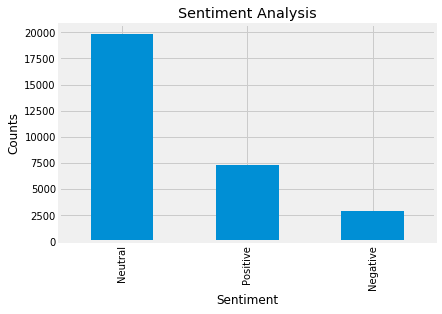

In [31]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
pdp['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

### Word Frequencies

In [32]:
import nltk
from nltk.tokenize import word_tokenize
tweets = pdp.tidy_tweet.str.cat(sep=' ')

In [33]:
#function to split text into word
tokens = word_tokenize(tweets)
vocabulary = set(tokens)
print(len(vocabulary))

frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:50]

30242


[':',
 ',',
 'PDP',
 '.',
 'APC',
 'Jonathan',
 "''",
 '-',
 '...',
 '``',
 '!',
 'in',
 'the',
 'Presidential',
 'is',
 'PU',
 'to',
 ')',
 'I',
 'of',
 '?',
 '(',
 ';',
 'for',
 'Nigeriadecides',
 'Buhari',
 'and',
 'Unit',
 'unit',
 "'s",
 '1',
 'NigeriaDecides',
 'a',
 'at',
 'polling',
 '”',
 'President',
 '“',
 'Villa',
 '%',
 'ward',
 'on',
 'are',
 'my',
 'The',
 '2',
 'Senate',
 'Lagos',
 '&',
 'votes']

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(1,1).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(pdp['tidy_tweet'], 500)
#for word, freq in common_words:
    #print(word, freq)

In [35]:
df1 = pd.DataFrame(common_words, columns = ['word' , 'count'])
df1.head(10)

word  count
0             pdp  28043
1             apc  21517
2        jonathan   9543
3             the   6607
4              in   6414
5    presidential   5359
6  nigeriadecides   4964
7            unit   4769
8              pu   4453
9              to   4435

In [36]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(pdp['tidy_tweet'], 300)
#for word, freq in common_words:
    #print(word, freq)

In [37]:
df2 = pd.DataFrame(common_words, columns = ['word' , 'count'])
df2.head(10)

word  count
0        polling unit   2421
1    presidential apc   1874
2  presidential villa   1468
3          senate apc   1287
4            pres apc   1086
5            aso rock    968
6             rep apc    932
7         defeats pdp    905
8         apc defeats    903
9             sen apc    881

In [38]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(pdp['tidy_tweet'], 200)
#for word, freq in common_words:
    #print(word, freq)

In [39]:
df3 = pd.DataFrame(common_words, columns = ['word' , 'count'])
df3.head(10)

word  count
0             apc defeats pdp    903
1              defeats pdp at    437
2             inside aso rock    419
3         jonathan inside aso    405
4    thrashes jonathan inside    393
5  presidential villa polling    370
6                 apc 334 pdp    362
7             my polling unit    352
8                 334 pdp 241    338
9      the presidential villa    336

In [40]:
tokenized_tweet = pdp['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [that's, all, I'm, asking,, and, it, seems, to...
1    [Reps:, PDP, 108,, APC, 530,, labour, party, 1...
2    [Presidential, result, finally, done, with, in...
3                     [jist, me, about, APC, and, pdp]
4    [Obasanjo, left, PDP, and, for, the, first, ti...
Name: tidy_tweet, dtype: object

In [41]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0    [that', all, i'm, asking,, and, it, seem, to, ...
1    [reps:, pdp, 108,, apc, 530,, labour, parti, 1...
2    [presidenti, result, final, done, with, in, my...
3                     [jist, me, about, apc, and, pdp]
4    [obasanjo, left, pdp, and, for, the, first, ti...
Name: tidy_tweet, dtype: object

In [42]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

pdp['tidy_tweet'] = tokenized_tweet

In [43]:
pdp['tidy_tweet'] = pdp['tidy_tweet'].astype(str)

In [44]:
party_id_df = pdp[['sentiment','party']].drop_duplicates().sort_values('sentiment')
category_to_id = dict(party_id_df.values)
id_to_category = dict(party_id_df[['party', 'sentiment']].values)
# Pick 5 random samples from the dataframe
pdp.sample(5, random_state=0)

original_text party  \
8225   “@elrufai: My polling unit 024 Anguwar Sarki W...   PDP   
10794  @gbengasesan @DebolaLagos @ThisIsBuhari wow am...   PDP   
9163   So I now begin to think... Will PDP be a stron...   PDP   
26591  What Jonathan Has To Say About Enugu Bomb Blas...   PDP   
6631   "@TerfaTG: Jos North Turaki 2 PU 003 APC 423 N...   PDP   

                                              tidy_tweet  Subjectivity  \
8225   “: My poll unit 024 anguwar sarki ward, kaduna...      0.000000   
10794  wow am over joy ,that pdp ha no vote in my pre...      1.000000   
9163   So I now begin to think... will pdp be a stron...      0.733333   
26591  what jonathan ha To say about enugu bomb blast...      0.000000   
6631   ": jo north turaki 2 PU 003 apc 423 ncp 1 pdp ...      0.000000   

       Polarity sentiment  sent  
8225   0.000000   Neutral     0  
10794  0.100000  Positive     1  
9163   0.433333  Positive     1  
26591  0.000000   Neutral     0  
6631   0.000000   Neutral     0

In [45]:
# Group the dataframe by categories and count items 
pdp.groupby('sentiment').party.count()

sentiment
Negative     2863
Neutral     19811
Positive     7327
Name: party, dtype: int64

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
labels = pdp.sentiment

In [48]:
labels.head()

0     Neutral
1     Neutral
2     Neutral
3     Neutral
4    Positive
Name: sentiment, dtype: object

In [49]:
text = pdp['tidy_tweet']

In [50]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=8, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

In [51]:
features = tfidf.fit_transform(text).toarray()

In [52]:
features.shape

(30001, 10292)

In [53]:
# Remember the dictionary created to map party to a number ? 
category_to_id.items()

dict_items([('Negative', 'PDP'), ('Neutral', 'PDP'), ('Positive', 'PDP')])

In [54]:
# The sorted function Converts dictionary items into a (sorted) list. 
# In subsequent steps - We will use this list to iterate over the categories
sorted(category_to_id.items())

[('Negative', 'PDP'), ('Neutral', 'PDP'), ('Positive', 'PDP')]

In [55]:
# Use chi-square analysis to find corelation between features (importantce of words) and labels(news category) 
from sklearn.feature_selection import chi2

N = 2  # We are going to look for top 3 categories

#For each category, find words that are highly corelated to it
for sentiment, party in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == sentiment)                   # Do chi2 analyses of all items in this category
  indices = np.argsort(features_chi2[0])                                  # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
  feature_names = np.array(tfidf.get_feature_names())[indices]            # Converts indices to feature names ( in increasing order of chi-squared stat values)
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]         # List of single word features ( in increasing order of chi-squared stat values)
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]          # List for two-word features ( in increasing order of chi-squared stat values)
  print("# '{}':".format(sentiment))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:]))) # Print 3 unigrams with highest Chi squared stat
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:]))) # Print 3 bigrams with highest Chi squared stat
  

# 'Negative':
  . Most correlated unigrams:
       . fail
       . lose
  . Most correlated bigrams:
       . jonathan lose
       . lose presidenti
# 'Neutral':
  . Most correlated unigrams:
       . lol
       . win
  . Most correlated bigrams:
       . lose presidenti
       . pdp win
# 'Positive':
  . Most correlated unigrams:
       . lol
       . win
  . Most correlated bigrams:
       . definit option
       . buhari definit


In [56]:
from sklearn.manifold import TSNE

# Sampling a subset of our dataset because t-SNE is computationally expensive
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)          # Randomly select 30 % of samples
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices]) # Array of all projected features of 30% of Randomly chosen samples

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

In [58]:
CV = 5  # Cross Validate with 5 different folds of 20% data ( 80-20 split with 5 folds )

#Create a data frame that will store the results for all 5 trials of the 3 different models
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = [] # Initially all entries are empty

In [59]:
#For each Algorithm 
for model in models:
  model_name = model.__class__.__name__
  # create 5 models with different 20% test sets, and store their accuracies
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  # Append all 5 accuracies into the entries list ( after all 3 models are run, there will be 3x5 = 15 entries)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

In [60]:
# Store the entries into the results dataframe and name its columns    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [61]:
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)

In [62]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LogisticRegression        0.874203
MultinomialNB             0.782639
RandomForestClassifier    0.660345
Name: accuracy, dtype: float64

In [63]:
cv_df

model_name  fold_idx  accuracy
0   RandomForestClassifier         0  0.660390
1   RandomForestClassifier         1  0.660333
2   RandomForestClassifier         2  0.660333
3   RandomForestClassifier         3  0.660333
4   RandomForestClassifier         4  0.660333
5            MultinomialNB         0  0.839693
6            MultinomialNB         1  0.840167
7            MultinomialNB         2  0.837667
8            MultinomialNB         3  0.768833
9            MultinomialNB         4  0.626833
10      LogisticRegression         0  0.901516
11      LogisticRegression         1  0.897167
12      LogisticRegression         2  0.900000
13      LogisticRegression         3  0.823000
14      LogisticRegression         4  0.849333

In [64]:
from sklearn.model_selection import train_test_split

model = LogisticRegression(random_state=0)

#Split Data 
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, pdp.index, test_size=0.33, random_state=0)

#Train Algorithm
model.fit(X_train, y_train)

# Make Predictions
y_pred_proba = model.predict_proba(X_test)
y_pred = model.predict(X_test)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [65]:
#Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=party_id_df.sentiment.values, yticklabels=party_id_df.sentiment.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')


Text(0.5, 18.5, 'Predicted')

In [66]:
model.fit(features, labels)


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)